# How to design successful broker strategies in a competitive simulation framework?

Power TAC is a competitive simulation that models a “liberalized” retail electrical energy market, where competing business entities or “brokers” offer energy services to customers through tariff contracts, and must then serve those customers by trading in a wholesale market. 
The retail market is a tariff market, in which customers are able to choose among tariff contract offerings from the competing brokers. Customers are models of household, business, and institutional users of electric power, as well as small-scale producers of power that own solar arrays or small wind turbines (Ketter et al. 2013, 2016a, 2016b).
Once a year a Power TAC competition is launched in which loose groups and institutions from all over the world are granted the option to implement a broker and test their strategies within a competitive simulation framework. 
More precisely, brokers are challenged to maximize their profits by buying and selling energy in the wholesale and retail markets, subject to fixed costs and constraints; the winner of an individual “game” is the broker with the highest bank balance at the end of a simulation run. 
Costs include fees for publication and withdrawal of tariffs, and distribution fees for transporting energy to their contracted customers. 
Costs are also incurred whenever there is an imbalance between a broker’s total contracted energy supply and demand within a given time slot.
However, the awards ceremony after the finals of each competition is only a starting point for the participating parties to gain insights into the underlying drivers of their performance.
Therefore, detailed log files are provided afterwards. 
Thereby, participants can reproduce single rounds and trace individual target figures and actions such as tariff transactions during the course of competitions.
Imagine you are a business entity who participated within the Power TAC finals of either 2016, 2017 or 2018. 
We provide you the respective log files comprising all the information you need to understand what drove your final performance. 
As you are planning to win next year’s competition (again), you are interested in deriving recommended actions by applying data analytics.

## Literature

Include data references and literature references here:

- Ketter, W., Collins, J., Reddy, P.: Power TAC: A competitive economic simulation of the smart grid.Energy Economics 39, 262-270 (2013)

- Ketter, W., Peters, M., Collins, J., Gupta, A.: Competitive benchmarking: An IS research approach to address wicked problems with big data and analytics. Management Information Systems Quarterly 40(4), 1057–1080 (2016a) 

- Ketter, W., Peters, M., Collins, J., Gupta, A.: A multiagent competitive gaming platform to address societal challenges. Management Information Systems Quarterly 40(2), 447–460 (2016b)

- Ketter, W., Collins, J., de Weerdt, M.: The 2017 Power Trading Agent Competition. ERIM Report Series Reference No. ERS-2017-002-LIS (2017). https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2916182 

# List of brokers
Choose the finals you are interested in. You can choose either the 2016, 2017 or 2018 finals.
Based on the file "list_of_games", derive a pandas DataFrame which provides a list of all participating brokers for each individual game. 
Please refer to the individual games by the use of column ‘gameName’.

The chosen broker is
### AgentUDE, Finals 2018

#### Data preparation

First, the list of all games is imported. Of these games, only the ones including AgentUDE are relevant. For this reason, all  games where AgentUDE does not participate are excluded.

Next, some columns that are not used in this analysis are dropped to improve the readability of the table

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  

In [2]:
df = pd.read_csv("Additional Information/finals_2018_games.csv", sep=";")
df.head()

gameId                gameName         status  gameSize  gameLength  \
0    1173  PowerTAC_2018_Finals_1  game_complete         7        1453   
1    1174  PowerTAC_2018_Finals_2  game_complete         7        1464   
2    1175  PowerTAC_2018_Finals_3  game_complete         7        1480   
3    1176  PowerTAC_2018_Finals_4  game_complete         7        1440   
4    1177  PowerTAC_2018_Finals_5  game_complete         7        1429   

   lastTick weatherLocation weatherDate  \
0      1452        cheyenne    28.06.14   
1      1463        cheyenne    07.08.14   
2      1479        cheyenne    20.05.14   
3      1438        cheyenne    07.09.14   
4      1428        cheyenne    09.11.13   

                                              logUrl     AgentUDE  \
0  http://ts.powertac.org/log/PowerTAC_2018_Final...  482399.5876   
1  http://ts.powertac.org/log/PowerTAC_2018_Final...  271735.4002   
2  http://ts.powertac.org/log/PowerTAC_2018_Final...  856820.7365   
3  http://ts.powertac.org/log/PowerTAC_2018_Final...  225668.4988   
4  http://ts.powertac.org/log/PowerTAC_2018_Final... -124025.9336   

         Bunnie  COLDPower18  CrocodileAgent        EWIIS3          SPOT  \
0  1.509985e+06  27402.61377     264231.0875 -1.090864e+06 -109702.28760   
1 -1.384777e+06 -25583.40376     552500.1079 -1.762152e+06  -85287.96651   
2  9.057515e+05  82641.72563     366208.5062 -8.244867e+05  -47622.37387   
3 -2.547008e+06  83506.09885     373340.1489 -6.016359e+05  -59395.46963   
4 -1.255826e+06 -27921.70818     283151.6630 -5.679227e+05   35630.08754   

   VidyutVanika  
0   112155.3127  
1   891376.6213  
2   393012.5855  
3  -177258.9085  
4   223404.0915

In [3]:
df.dropna(subset=["AgentUDE"], inplace=True) 
df = df [["gameId","gameName","gameSize","AgentUDE", 
          "Bunnie", "COLDPower18", "CrocodileAgent",
          "EWIIS3", "SPOT", "VidyutVanika"]]
df.head()

gameId                gameName  gameSize     AgentUDE        Bunnie  \
0    1173  PowerTAC_2018_Finals_1         7  482399.5876  1.509985e+06   
1    1174  PowerTAC_2018_Finals_2         7  271735.4002 -1.384777e+06   
2    1175  PowerTAC_2018_Finals_3         7  856820.7365  9.057515e+05   
3    1176  PowerTAC_2018_Finals_4         7  225668.4988 -2.547008e+06   
4    1177  PowerTAC_2018_Finals_5         7 -124025.9336 -1.255826e+06   

   COLDPower18  CrocodileAgent        EWIIS3          SPOT  VidyutVanika  
0  27402.61377     264231.0875 -1.090864e+06 -109702.28760   112155.3127  
1 -25583.40376     552500.1079 -1.762152e+06  -85287.96651   891376.6213  
2  82641.72563     366208.5062 -8.244867e+05  -47622.37387   393012.5855  
3  83506.09885     373340.1489 -6.016359e+05  -59395.46963  -177258.9085  
4 -27921.70818     283151.6630 -5.679227e+05   35630.08754   223404.0915

## Performance of your broker
The file "list_of_games" includes information on your final bank account within each individual simulation. Based on the information provided, analyze the performance of your broker. Visualize your results if possible.
### In which type of games does your broker perform best?
In order to answer this question, the different game sizes are analyzed and compared in the following section

In [4]:
dfgroup = df.groupby("gameSize")
dfEvaluate = dfgroup[["AgentUDE"]].agg([np.mean,np.min,np.max])

In [5]:
dfEvaluate.head()

AgentUDE                           
                  mean         amin          amax
gameSize                                         
2         5.618906e+06 -102541.6642  2.000000e+07
4         7.767311e+05 -717212.5484  5.215530e+06
7         4.996460e+05 -787366.5697  1.889284e+06

After grouping the results of AgentUDE, a trend can be observed. The more brokers are involved in a game, the lower the average end result is. Additionally, the minimum and the maximum are also lower.

To measure the individual performance better, for each category of size 2 games, size 4 games and size 7 games the number of games that were finished with a credit, the number of competitors left behind and the distribution of these results are calculated.

In [6]:
def countAboveZero (row):
    if(row > 0):
        return True
    else:
        return False
def aboveAllCompetitors(row):
    columns = ["Bunnie", "COLDPower18", "CrocodileAgent", "EWIIS3", "SPOT","VidyutVanika"]
    i = 0
    for column in columns:
        if (row[column] < row["AgentUDE"]):
            i += 1
    return i
def getDistribution(series, length):
    dicti = {0:0}
    for i in range(length):
        dicti[i] = 0
    for value in series:
        dicti[value] = dicti[value] + 1
    return dicti

In [7]:
df["positive"] = df["AgentUDE"].apply(countAboveZero)
df["beaten"] = df.apply(aboveAllCompetitors, axis=1)

In [8]:
df7 = df[df["gameSize"] == 7]
df4 = df[df["gameSize"] == 4]
df2 = df[df["gameSize"] == 2]

liste2 = getDistribution(df2["beaten"].values, 2)
liste4 = getDistribution(df4["beaten"].values, 4)
liste7 = getDistribution(df7["beaten"].values, 7)

In [9]:
print("game size | positive games | games won \r\n----------------------------------------")

print ("        2 |          "+str(len(df2[df2["positive"]]))+"/"+str( len(df2)) +" |      " +str(liste2[1])+"/"+str( len(df2)))
print ("        4 |          "+str(len(df4[df4["positive"]]))+"/"+str( len(df4)) +" |      " +str(liste4[3])+"/"+str( len(df4)))
print ("        7 |         "+str(len(df7[df7["positive"]]))+"/"+str( len(df7)) +" |     " +str(liste7[6])+"/"+str( len(df7)))

game size | positive games | games won 
----------------------------------------
        2 |          23/24 |      22/24
        4 |          67/80 |      31/80
        7 |         87/100 |     39/100


In games of size 2, the broker matches up best. Almost all of the games are finished with a credit and all but two are won by the broker. Combined with the best overall mean performance, it is clear that the broker is strongest in games with only one external competitor

For the other game sizes, place distribution might be more interesting

<BarContainer object of 4 artists>

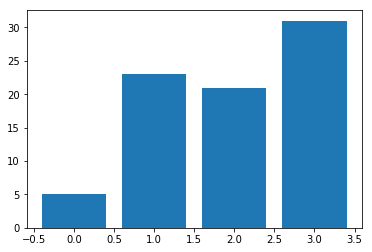

In [10]:
plt.bar(liste4.keys(),liste4.values())

In games of size 4, the results are a lot more mixed. AgentUDE ended up in the last place sometimes but in most cases was placed first to third. The portion of games won is very similar to the size 7 games. Of the 80 games played, roughly a third of the games were not that successful with the broker placing last or second to last. Overall, the size 4 games are worse than the size 2 games.

<BarContainer object of 7 artists>

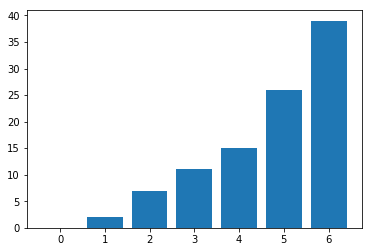

In [11]:
plt.bar(liste7.keys(),liste7.values())

In games of size 7, the broker performs better in comparison to the games of size 4. The win rate is comparable to the win rate in games of size 4, but the overall placements are better. The games won form the largest portion of the games. Furthermore, the broker performs above average placing first to third in more than 50% of the games.

#### Conclusion
AgentUDE participated very successfully in the PowerTAC 2018 competition. It dominated the games of size 2, defeating every other broker in direct competition in a majority of games. In larger games, the results very also very robust and show that the broker model seems successful. On the other hand, the broker had mixed results in size 4 games. 

### Which brokers do you tend to outperform and which not?
To answer this question, each of the game types is plotted and the results are combined to find the correct brokers

At first, the games of size 2 are plotted.

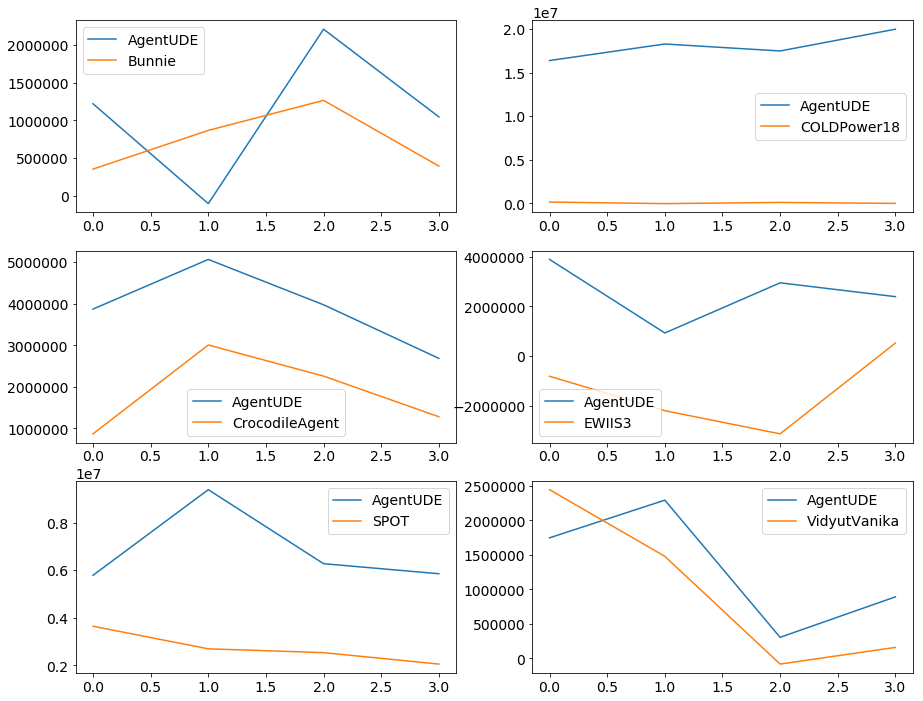

In [12]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(15,12), nrows=3, ncols=2)

combs = [["AgentUDE", "Bunnie"],["AgentUDE", "COLDPower18"],["AgentUDE", "CrocodileAgent"],
         ["AgentUDE", "EWIIS3"],["AgentUDE", "SPOT"],["AgentUDE", "VidyutVanika"]]
i = 0
for row in ax:
    for col in row:
        col.plot(df2[combs[i]].dropna(subset=combs[i]).values)
        col.legend(combs[i])
        i = i + 1

plt.show()

The most decisive games were played against COLDPower18. There, AgentUDE consistently won all games with very high results. The second highest results can be found in the games against the SPOT broker. The margin by which AgentUDE won is much lower but the distance to the other broker is still high. The games against EWIIS3 and Crocodile Agent were won in a similar manner

The only two brokers that took one game away from AgentUDE are Bunnie and VidyutVanika. There, Bunnie caused AgentUDE to have the only negative result across all games played at size 2. The performance of VidyutVanika and AgentUDE is very similar, which resulted in small wins for both brokers.

Now, the games of size 4 are plotted.

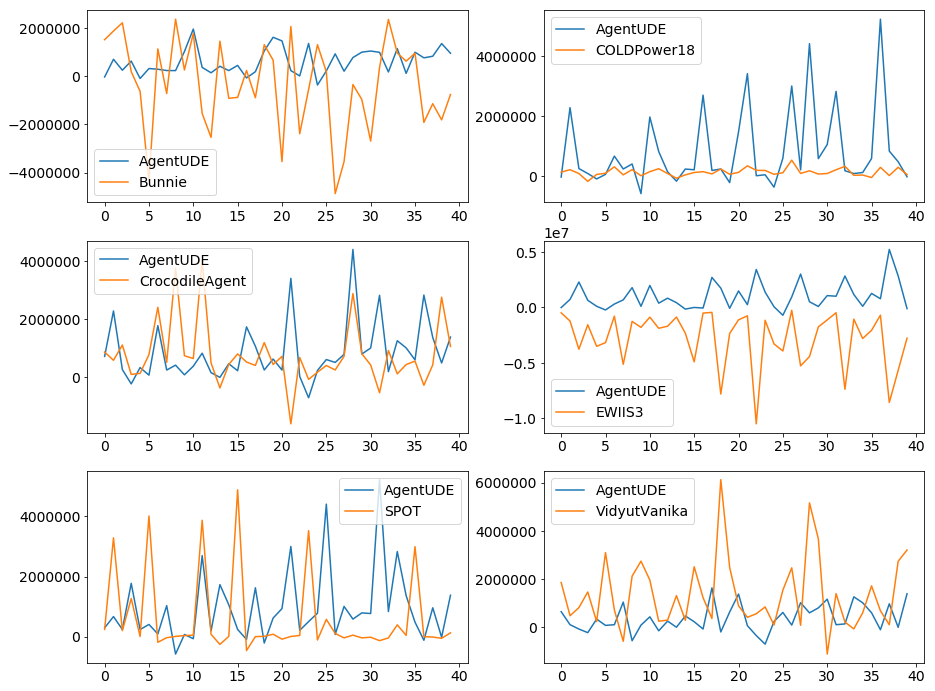

In [13]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(15,12), nrows=3, ncols=2)

combs = [["AgentUDE", "Bunnie"],["AgentUDE", "COLDPower18"],["AgentUDE", "CrocodileAgent"],
         ["AgentUDE", "EWIIS3"],["AgentUDE", "SPOT"],["AgentUDE", "VidyutVanika"]]
i = 0
for row in ax:
    for col in row:
        col.plot(df4[combs[i]].dropna(subset=combs[i]).values)
        col.legend(combs[i])
        i = i + 1

plt.show()

In the size 4 game environment, the broker struggled a bit. Especially against certain combinations of brokers, AgentUDE could not gain a noticeable profit.

Of the 6 brokers, it performed best against EWIIS3. A less decisive advantage can be found against COLDPower18. The broker that consistently beat AgentUDE and reduced the overall profit the most is VidyutVanika. The other three brokers, SPOT, Bunnie and CrocodileAgent have similar results as AgentUDE and loog to be equally successful in size 4 games.

Now, to conclude the results, the 7 player games are plotted.

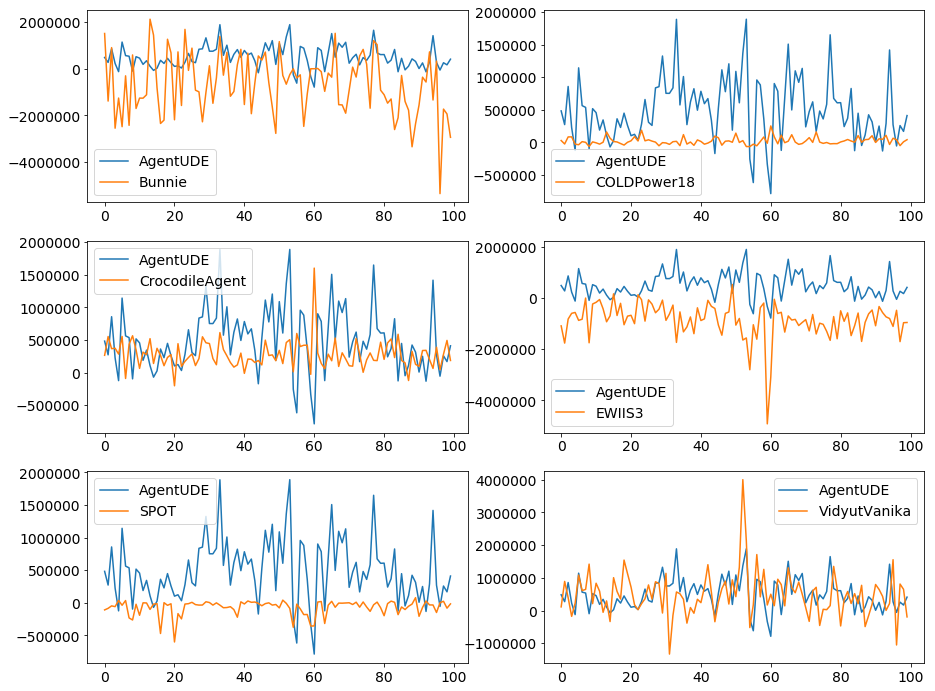

In [14]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(15,12), nrows=3, ncols=2)

combs = [["AgentUDE", "Bunnie"],["AgentUDE", "COLDPower18"],["AgentUDE", "CrocodileAgent"],
         ["AgentUDE", "EWIIS3"],["AgentUDE", "SPOT"],["AgentUDE", "VidyutVanika"]]
i = 0
for row in ax:
    for col in row:
        col.plot(df7[combs[i]].dropna(subset=combs[i]).values)
        col.legend(combs[i])
        i = i + 1

plt.show()

In games of size 7, AgentUDE was more successful again beating SPOT, COLDPower18 and EWIIS3 consistently and gaining a small profit. A bit more mixed but with a smiliar high profit AgentUDE outperformed CrocodileAgent. The Bunnier broker suffered large losses but kept up with AgentUDE in some games. Finally, VidyutVanika was on a very similar level as AgentUDE

#### Result

Across the different game sizes, the brokers that are mostly weaker than AgentUDE are EWIIS3, COLDPower18, SPOT and CrocodileAgent. Bunnie operates in a way that is very instable and thus beats AgentUDE in some and looses clearly in other games. The only broker that can be considered as comparable in means of profit is VidyutVanika that performs better in games of size 4 and similar in games of size 7.

# Log files
There exist four different kind of log files describing your broker: BrokerAccounting,BrokerImbalanceCost, BrokerMktPrices and TariffMktShare.
We provide additional files (logtool_type_labels.xlsx) which depict the information
contained in each column of the log files. For further information, please attend the
workshop on November 29.
## Broker Accounting
Please note that "broker0" is the default broker which is always participating but not
designed by a participating party.
Furthermore, the enumeration of broker ids is not in line with the respective one in the csv game list. You should match the broker name and broker+id labels by the use of the overall bank position in the csv file and the cash position in the last period of the simulation.
### Cleaned excel sheet
Choose one .csv file of the folder "BrokerAccounting".
Import it as a Pandas Dataframe, provide 10 exemplary lines and rename columns so that the names are informative.

In [15]:
df = pd.read_csv("2018 Finals/PowerTAC_2018_Finals_100_BrokerAccounting.csv", sep=";")

df.rename(columns = {'ts':'Timeslot', 'dow':"Day of Week", 'hod':'Hour of Day'}, inplace=True)
df.rename(columns = {'ttx-sc':'Tariff Transaction Payments Credit', 'ttx-sd':"Tariff Transaction Costs Debit", 'ttx-uc':'Tariff Transaction Regular Credit'}, inplace=True)
df.rename(columns = {'ttx-ud':'Tariff Transaction Regular Debit', 'mtx-c':"Market Transaction Credit", 'mtx-d':'Market Transaction Debit'}, inplace=True)
df.rename(columns = {'btx-c':'Balancing Transaction Credit', 'btx-d':"Balancing Transaction Debit", 'dtx-c':'Distribution Transaction Credit'}, inplace=True)
df.rename(columns = {'dtx-d':'Distribution Transaction Debit', 'ctx-c':"Capacity Transaction Credit", 'ctx-d':'Capacity Transaction Debit'}, inplace=True)
df.rename(columns = {'bce-c':'Balancing Control Event Credit', 'bce-d':"Balancing Control Event Debit", 'bank-c':'Bank Interest Credit'}, inplace=True)
df.rename(columns = {'bank-d':'Bank Interest Debit'}, inplace=True)
pd.options.display.max_columns = 21
df.head(10)

Timeslot  Day of Week  Hour of Day          broker  \
0       360            6            0  default broker   
1       360            6            0  CrocodileAgent   
2       360            6            0            SPOT   
3       360            6            0     COLDPower18   
4       360            6            0    VidyutVanika   
5       360            6            0          EWIIS3   
6       360            6            0        AgentUDE   
7       360            6            0          Bunnie   
8       361            6            1  default broker   
9       361            6            1  CrocodileAgent   

  Tariff Transaction Payments Credit Tariff Transaction Costs Debit  \
0                             0,0000                         0,0000   
1                             0,0000                    -16419,1487   
2                             0,0000                    -16419,1487   
3                             0,0000                         0,0000   
4                             0,0000                     -8209,5744   
5                             0,0000                    -16419,1487   
6                             0,0000                    -16419,1487   
7                             0,0000                    -16419,1487   
8                             0,0000                         0,0000   
9                             0,0000                    -10118,5744   

  Tariff Transaction Regular Credit Tariff Transaction Regular Debit  \
0                        18795,9857                          -1,8480   
1                            0,0000                           0,0000   
2                            0,0000                           0,0000   
3                            0,0000                           0,0000   
4                            0,0000                           0,0000   
5                            0,0000                           0,0000   
6                            0,0000                           0,0000   
7                            0,0000                           0,0000   
8                        18905,4473                          -2,1753   
9                            0,0000                           0,0000   

  Market Transaction Credit Market Transaction Debit  \
0                    0,0000                   0,0000   
1                    0,0000                   0,0000   
2                    0,0000                   0,0000   
3                    0,0000                   0,0000   
4                    0,0000                   0,0000   
5                    0,0000                   0,0000   
6                    0,0000                   0,0000   
7                    0,0000                   0,0000   
8                    0,0000               -1006,8913   
9                    0,0000                   0,0000   

  Balancing Transaction Credit Balancing Transaction Debit  \
0                       0,0000                  -7010,3722   
1                       0,0000                      0,0000   
2                       0,0000                      0,0000   
3                       0,0000                      0,0000   
4                       0,0000                      0,0000   
5                       0,0000                      0,0000   
6                       0,0000                      0,0000   
7                       0,0000                      0,0000   
8                       0,0000                    -38,4040   
9                       0,0000                      0,0000   

  Distribution Transaction Credit Distribution Transaction Debit  \
0                          0,0000                      -866,3050   
1                          0,0000                         0,0000   
2                          0,0000                         0,0000   
3                          0,0000                         0,0000   
4                          0,0000                         0,0000   
5                          0,0000                         0,0000   
6                       

### Explanation of columns for Broker Accounting
+ Timeslot - the simulated Timeslot
+ Day of Week - the day of week in the simulation
+ Hour of Day - the hour of day in the simulation
+ broker - The name label of the broker
+ Tariff Transaction Payments Credit - the non regular tariff payments, for instance early withdrawal penalties
+ Tariff Transaction Costs Debit - the non regular tariff costs, for instance tarif
+ Tariff Transaction Regular Credit - the regular tariff credits
+ Tariff Transaction Regular Debit - the regular tariff debits
+ Market Transaction Credit - the payments for energy sold on the Wholesale Market
+ Market Transaction Debit - the payments for energy bought on the Wholesale Market
+ Balancing Transaction Credit - the payments for the Balancing Market, selling energy that exceeded customer demand
+ Balancing Transaction Debit - the payments for the Balancing Market, buying energy that was needed to fulfill customer demand
+ Distribution Transaction Credit - the payments for the distribution of energy (Never happens to be positive)
+ Distribution Transaction Debit - the costs for the distribution of energy over the grid
+ Capacity Transaction Credit - the payment for contribution to peak demand
+ Capacity Transaction Debit - the costs for contribution to peak demand
+ Balancing Control Event Credit - the payment for executed balancing control on customer demand
+ Balancing Control Event Debit - the costs associtated with the execution of balancing control on customer demand
+ Bank Interest Credit - the credit based on the Bank Interest Rate
+ Bank Interest Debit - the debit based on the Bank Interest Rate
+ Cash - the total money accounted for this broker, sum of previous cash position and all preceding columns

### Cash position
##### What is the relation between the cash position and all other information provided? 

The cash position is the main measure of broker performance. The cash position can be calculated from the other positions by adding all other values in that row to the previous cash value. Different values have a different impact on the cash position. Deriving the fields in which the broker is behaving efficiently is just looking at the different scale of the values and their development.

##### Information and business goal
Your business goal is to design competitive tariffs.
In which way is the individual information relevant in order to reach that goal?

There are 8 types of payments that are listed in the table. The tariff transaction regular is one of the most important columns. There, the total income for the current tariffs is listed. It is the primary source of income. The second important column is the market transaction, which contains the price of the electricity bought. The third category that can be optimized is the capacity transaction, which applies a penalty to brokers that produce market imbalances.

The columns bank interest and distribution transaction are important for the final profit and play a role in the decision process of the broker, but are fixed and mainly out of control of the broker.

The capacity transaction is and the tariff transaction payments and costs are only important for specific tariff models.

As already stated above, the cash position is the main measure for broker success and is thus important to evaluate the brokers capabilities.

## Other log files
Apart from BrokerAccounting, you are provided with the folders BrokerImbalanceCost, BrokerMktPrices and TariffMktShare. 
### Explain Columns
Chose one file per folder, extract (only) the column lables and briefly explain them.

In [16]:
df = pd.read_csv("2018 Finals/PowerTAC_2018_Finals_1_BrokerImbalanceCost.csv", sep=";")

df.head(0)

Empty DataFrame
Columns: [game, timeslot, broker, netDemand, mktQty, mktCost, imbalance, imbalanceCost, mktImbCost, estCost]
Index: []

### Broker Imbalance Cost Table Explanation

+ game - refers to the game name
+ timeslot - the simulated timeslot
+ broker - the broker name label
+ netDemand - describes the net electricity demand of all customers that are subscribed to tariffs of this broker
+ mktQty - describes the quantity that is traded in the wholesale market
+ mktCost - describes the costs of trading the quantity designated by *mktQty*
+ imbalance - calculates the imbalance between *netDemand* and *mktQty*
+ imbalanceCost - the associated costs that are calculated from the *imbalance*
+ the other two columns are not used

In [17]:
df = pd.read_csv("2018 Finals/PowerTAC_2018_Finals_1_BrokerMktPrices.csv", sep=";")

df.head(0)

Empty DataFrame
Columns: [ts,  dow,  hod, default broker_mwh,  default broker_price , CrocodileAgent_mwh,  CrocodileAgent_price , SPOT_mwh,  SPOT_price , COLDPower18_mwh,  COLDPower18_price , EWIIS3_mwh,  EWIIS3_price , VidyutVanika_mwh,  VidyutVanika_price , AgentUDE_mwh,  AgentUDE_price , Bunnie_mwh,  Bunnie_price ]
Index: []

### Broker (Wholesale) Market Prices Table Explanation

+ ts - Timeslot
+ dow - Day of Week
+ hod - Hour of Day
+ default broker_mwh - the amount of mwh traded in that timeslot
+ default broker_price - the realized prize per mwh for this timeslot
+ the \_mwh and \_price information are given for every broker separatly 

In [18]:
df = pd.read_csv("2018 Finals/PowerTAC_2018_Finals_1_TariffMktShare.csv", sep=",")

df.head(0)

Empty DataFrame
Columns: [ts,  default broker,  CrocodileAgent,  SPOT,  COLDPower18,  EWIIS3,  VidyutVanika,  AgentUDE,  Bunnie,  total]
Index: []

### Tariff Market Share Table Explanation

+ ts - timeslot
+ Broker columns - amount of customers subscribed to tariffs issued by this broker
+ total - total number of available customers

### Information and business goal
Given your business target, for what purposes and analyses could you use the respective information?

The BrokerImbalanceCost Table could be used for analysing the imbalance structure of the broker. If the actual consumption is much higher or lower than the traded and thus the expected consumption, the broker wrongly predicted the this category and has to improve its prediction model. The imbalance cost size can be an indicator of the participation of the broker on the total imbalance. In environments with competitors that are very accurate, accuracy is more important as the imbalance costs are overall smaller. If the other competitors are not that good at predicting, the own broker imbalance is not a criteria that is that important for broker performance.

The BrokerMarketPrices table could be used to analyze the average realized price per mwh and deduce the performance of the broker at acquiring the energy needed for a low price. The broker can be compared to other brokers to identify the strength of the broker in this area of broker design and look whether he could have traded lower.

The TariffMktShare table is important to determine the effectivity of tariff design to attract customers. Additionally, it shows which brokers attract customers better.

# Games
## Choose 10 games

To analyze the performance of AgentUDE, it is important to look at the different types of games given. As there are always different sized games, it is important to understand which aspects are important under which circumstances and how to optimize the broker quality to work well in all environments.

Of the different game sizes, the most important one to understand the difficulties of AgentUDE is the game size 4. There, the broker has a difficult time at staying positive and outperforming the other brokers.

For this reason, 3 games are selected of the game size 2, 4 games are selected from the game size 4 and 3 games from the game size 7.

#### Size 2 Game Selection

The above analysis of the different game types revealed that AgentUDE only lost two games, having a lower profit than another broker. Those two games are the the first game agains VidyutVanika and the second game against the Bunnie broker. If there can be found a weakness in the broker strategy, it can probably be found in these two games. By coincidence, the game against Bunnie also involved the only size 2 game with a credit as finishing score. Additionally, the game with the highest profit is selected, which was played against COLDPower18.

In [19]:
#All games lost overall
lostgames2 = df2[df2['beaten'] == 0]
lostgames2

gameId                  gameName  gameSize      AgentUDE       Bunnie  \
254    1427  PowerTAC_2018_Finals_255         2  1.747572e+06          NaN   
268    1441  PowerTAC_2018_Finals_269         2 -1.025417e+05  866811.6037   

     COLDPower18  CrocodileAgent  EWIIS3  SPOT  VidyutVanika  positive  beaten  
254          NaN             NaN     NaN   NaN   2445574.522      True       0  
268          NaN             NaN     NaN   NaN           NaN     False       0

In [20]:
#The game lost against VidyutVanika
game1 = lostgames2.dropna(subset=['VidyutVanika'])
#Dropping irrelevant columns
game1 = game1.dropna(axis=1)
game1

gameId                  gameName  gameSize     AgentUDE  VidyutVanika  \
254    1427  PowerTAC_2018_Finals_255         2  1747572.435   2445574.522   

     positive  beaten  
254      True       0

In [21]:
#The game lost against Bunnie
game2 = lostgames2.dropna(subset=['Bunnie'])
#Dropping irrelevant columns
game2 = game2.dropna(axis=1)
game2

gameId                  gameName  gameSize     AgentUDE       Bunnie  \
268    1441  PowerTAC_2018_Finals_269         2 -102541.6642  866811.6037   

     positive  beaten  
268     False       0

In [22]:
#The game with the highest profit
game3 = df2.sort_values('AgentUDE', ascending=False).head(1).dropna(axis=1)
game3

gameId                  gameName  gameSize    AgentUDE  COLDPower18  \
311    1484  PowerTAC_2018_Finals_312         2  20000000.0 -7064.132896   

     positive  beaten  
311      True       1

In [23]:
#The game with the lowest profit
df2.sort_values('AgentUDE', ascending=True).head(1).dropna(axis=1)

gameId                  gameName  gameSize     AgentUDE       Bunnie  \
268    1441  PowerTAC_2018_Finals_269         2 -102541.6642  866811.6037   

     positive  beaten  
268     False       0

Thus, the games with the IDs 1427, 1441 and 1484 are selected for deeper analysis.

#### Size 4 Game Selection

Again, the analysis should be based on best and worst performance in the two basic measures: being placed last and being placed first as well as the highest overall profit and the lowest overall profit.

In [24]:
#All games lost overall
lostgames4 = df4[df4['beaten'] == 0]
lostgames4

gameId                  gameName  gameSize      AgentUDE       Bunnie  \
114    1287  PowerTAC_2018_Finals_115         4   63893.98288          NaN   
133    1306  PowerTAC_2018_Finals_134         4 -575089.65210          NaN   
168    1341  PowerTAC_2018_Finals_169         4 -209217.53430          NaN   
181    1354  PowerTAC_2018_Finals_182         4 -360087.06060  1318136.653   
209    1382  PowerTAC_2018_Finals_210         4  183820.47200  2368676.724   

      COLDPower18  CrocodileAgent  EWIIS3         SPOT  VidyutVanika  \
114  101460.99330     773312.8068     NaN          NaN   3093184.303   
133   18741.60990             NaN     NaN  11003.30734   2112036.337   
168   67919.83082             NaN     NaN  13976.61587   6127580.378   
181   66308.01599             NaN     NaN          NaN    548218.338   
209  331858.81720     914203.3332     NaN          NaN           NaN   

     positive  beaten  
114      True       0  
133     False       0  
168     False       0  
181     False       0  
209      True       0

As can be seen, most of the games lost involve VidyutVanika and all of them include COLDPower18. For this reason, it might be interesting to see how the broker looses in the scenario where the strong broker VidyutVanika is not present. This can be more insightful as the analysis already showed that VidyutVanika has a better performance than AgentUDE in games of size 4.

In [25]:
#Select game where VidyutVanika is not involved
game4 = lostgames4[lostgames4['VidyutVanika'].isnull()]
#Dropping irrelevant columns
game4 = game4.dropna(axis=1)
game4

gameId                  gameName  gameSize    AgentUDE       Bunnie  \
209    1382  PowerTAC_2018_Finals_210         4  183820.472  2368676.724   

     COLDPower18  CrocodileAgent  positive  beaten  
209  331858.8172     914203.3332      True       0

In [26]:
wongames4 = df4[df4['beaten']==3]
wongames4

gameId                  gameName  gameSize      AgentUDE        Bunnie  \
103    1276  PowerTAC_2018_Finals_104         4  2.279653e+06           NaN   
113    1286  PowerTAC_2018_Finals_114         4  3.254315e+05 -4.359164e+06   
121    1294  PowerTAC_2018_Finals_122         4  2.424610e+05 -7.153881e+05   
132    1305  PowerTAC_2018_Finals_133         4  1.032541e+06  2.666446e+05   
136    1309  PowerTAC_2018_Finals_137         4  1.967983e+06  1.782018e+06   
148    1321  PowerTAC_2018_Finals_149         4  4.560390e+05 -8.733082e+05   
156    1329  PowerTAC_2018_Finals_157         4  1.941628e+05 -8.884430e+05   
157    1330  PowerTAC_2018_Finals_158         4  1.731077e+06           NaN   
167    1340  PowerTAC_2018_Finals_168         4  1.625340e+06  6.749402e+05   
171    1344  PowerTAC_2018_Finals_172         4  1.474897e+06 -3.545493e+06   
173    1346  PowerTAC_2018_Finals_174         4  3.406170e+06           NaN   
179    1352  PowerTAC_2018_Finals_180         4  1.368101e+06 -5.455052e+05   
183    1356  PowerTAC_2018_Finals_184         4  2.252418e+05  1.917487e+05   
189    1362  PowerTAC_2018_Finals_190         4  9.359551e+05 -4.876479e+06   
190    1363  PowerTAC_2018_Finals_191         4  2.998336e+06           NaN   
191    1364  PowerTAC_2018_Finals_192         4  2.141073e+05 -3.543519e+06   
193    1366  PowerTAC_2018_Finals_194         4  7.824717e+05 -3.391941e+05   
194    1367  PowerTAC_2018_Finals_195         4  4.403951e+06           NaN   
202    1375  PowerTAC_2018_Finals_203         4  1.007043e+06 -9.593512e+05   
206    1379  PowerTAC_2018_Finals_207         4  1.054190e+06 -2.690977e+06   
207    1380  PowerTAC_2018_Finals_208         4  9.999722e+05  3.656990e+05   
208    1381  PowerTAC_2018_Finals_209         4  2.819964e+06           NaN   
214    1387  PowerTAC_2018_Finals_215         4  1.153853e+06  9.726974e+05   
217    1390  PowerTAC_2018_Finals_218         4  1.252112e+06           NaN   
218    1391  PowerTAC_2018_Finals_219         4  1.004852e+06  9.617168e+05   
224    1397  PowerTAC_2018_Finals_225         4  7.714067e+05 -1.914172e+06   
225    1398  PowerTAC_2018_Finals_226         4  5.215530e+06           NaN   
226    1399  PowerTAC_2018_Finals_227         4  8.372125e+05 -1.136265e+06   
227    1400  PowerTAC_2018_Finals_228         4  2.829097e+06           NaN   
228    1401  PowerTAC_2018_Finals_229         4  1.364136e+06 -1.808510e+06   
237    1410  PowerTAC_2018_Finals_238         4  9.620612e+05 -7.558032e+05   

      COLDPower18  CrocodileAgent        EWIIS3           SPOT  VidyutVanika  \
103  219194.44670    5.770052e+05 -3.777847e+06            NaN           NaN   
113           NaN    1.233490e+05           NaN            NaN  2.225230e+05   
121   47679.17316             NaN           NaN  203903.783800           NaN   
132           NaN             NaN           NaN  -30676.650220 -5.969002e+05   
136  152855.71740             NaN -8.873258e+05            NaN           NaN   
148           NaN    4.333359e+05           NaN            NaN  2.737476e+05   
156   78583.08635             NaN           NaN   81392.467460           NaN   
157           NaN    5.159844e+05 -7.813212e+06 -253531.255100           NaN   
167           NaN             NaN           NaN    3887.317081  3.507107e+05   
171  130696.43530             NaN -1.128513e+06            NaN           NaN   
173  347108.55130   -1.617587e+06 -1.050000e+07            NaN           NaN   
179           NaN             NaN -1.166149e+06            NaN  8.794867e+05   
183           NaN    1.660603e+05           NaN            NaN  7.808903e+04   
189           NaN             NaN -2.672420e+05  -79577.209480           NaN   
190  534933.05460             NaN -5.271376e+06    9747.951704           NaN   
191   94928.86810             NaN           NaN   42552.615660           NaN   
193           NaN    7.155032e+05           NaN -107069.261900           NaN   
194  182826.58790    2.880837e+06   

Of the games won by AgentUDE, the ones that were won involving VidyutVanika can be used to derive a strategy to improve the broker. For this reason, a game with this broker is a good choice.

In [27]:
wongames4 = wongames4.dropna(subset=['VidyutVanika'])
wongames4.sort_values('VidyutVanika', ascending=False, inplace=True)
wongames4

C:\Users\Philipp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


gameId                  gameName  gameSize      AgentUDE        Bunnie  \
179    1352  PowerTAC_2018_Finals_180         4  1.368101e+06 -5.455052e+05   
218    1391  PowerTAC_2018_Finals_219         4  1.004852e+06  9.617168e+05   
167    1340  PowerTAC_2018_Finals_168         4  1.625340e+06  6.749402e+05   
148    1321  PowerTAC_2018_Finals_149         4  4.560390e+05 -8.733082e+05   
113    1286  PowerTAC_2018_Finals_114         4  3.254315e+05 -4.359164e+06   
237    1410  PowerTAC_2018_Finals_238         4  9.620612e+05 -7.558032e+05   
183    1356  PowerTAC_2018_Finals_184         4  2.252418e+05  1.917487e+05   
202    1375  PowerTAC_2018_Finals_203         4  1.007043e+06 -9.593512e+05   
217    1390  PowerTAC_2018_Finals_218         4  1.252112e+06           NaN   
132    1305  PowerTAC_2018_Finals_133         4  1.032541e+06  2.666446e+05   
214    1387  PowerTAC_2018_Finals_215         4  1.153853e+06  9.726974e+05   

     COLDPower18  CrocodileAgent       EWIIS3          SPOT  VidyutVanika  \
179          NaN             NaN -1166149.061           NaN  8.794867e+05   
218          NaN     429002.0680          NaN           NaN  5.874310e+05   
167          NaN             NaN          NaN   3887.317081  3.507107e+05   
148          NaN     433335.8714          NaN           NaN  2.737476e+05   
113          NaN     123348.9880          NaN           NaN  2.225230e+05   
237          NaN             NaN          NaN  -9600.624380  9.192456e+04   
183          NaN     166060.2881          NaN           NaN  7.808903e+04   
202          NaN             NaN          NaN -37332.092970  6.893712e+04   
217          NaN     107763.0153 -2073197.232           NaN -8.215113e+04   
132          NaN             NaN          NaN -30676.650220 -5.969002e+05   
214          NaN             NaN -1065676.684           NaN -1.129997e+06   

     positive  beaten  
179      True       3  
218      True       3  
167      True       3  
148      True       3  
113      True       3  
237      True       3  
183      True       3  
202      True       3  
217      True       3  
132      True       3  
214      True       3

Now, the game with the best performance from VidyutVanika is selected in order to be able to make statements on strategic decisions that let AgentUDE have a higher income than VidyutVanika

In [28]:
#Select game with the highest profit for VidyutVanika
game5 = wongames4.head(1)
#Dropping irrelevant columns
game5 = game5.dropna(axis=1)
game5

gameId                  gameName  gameSize     AgentUDE       Bunnie  \
179    1352  PowerTAC_2018_Finals_180         4  1368101.167 -545505.1674   

          EWIIS3  VidyutVanika  positive  beaten  
179 -1166149.061   879486.7239      True       3

In [29]:
#The game with AgentUDE's best performance is selected
game6 = df4.sort_values('AgentUDE', ascending=False).head(1).dropna(axis=1)
game6

gameId                  gameName  gameSize     AgentUDE  COLDPower18  \
225    1398  PowerTAC_2018_Finals_226         4  5215530.461  297029.9538   

          EWIIS3         SPOT  positive  beaten  
225 -8573430.679 -128744.3706      True       3

In [30]:
#The game with AgentUDE's worst performance is selected too
game7 = df4.sort_values('AgentUDE', ascending=True).head(1).dropna(axis=1)
game7

gameId                  gameName  gameSize     AgentUDE  CrocodileAgent  \
182    1355  PowerTAC_2018_Finals_183         4 -717212.5484    -82077.79004   

          EWIIS3  VidyutVanika  positive  beaten  
182 -3935073.937   831975.6214     False       1

The games selected for further analysis are the games with the IDs 1382, 1352, 1398 and 1355. The fact that the selected games involve a diversity of brokers indicates that the results can be robust although the analysis is not significant with this small amount of games selected.

#### Size 7 game selection

Similar to the games of size 7, different games based on the metrics final profit and position in relation to the other brokers are selected. As there are 3 games left for selection, one that seems redundant of these four will be left out.

In [31]:
#All games lost overall
lostgames7 = df7[df7['beaten'] == 0]
lostgames7

Empty DataFrame
Columns: [gameId, gameName, gameSize, AgentUDE, Bunnie, COLDPower18, CrocodileAgent, EWIIS3, SPOT, VidyutVanika, positive, beaten]
Index: []

Because there are no games with AgentUDE placed last, the ones where AgentUDE was awarded the second to last place are included in this category.

In [32]:
#All games lost and placed second to last overall
lostgames7 = df7[df7['beaten'] <= 1]
lostgames7

gameId                 gameName  gameSize     AgentUDE       Bunnie  \
55    1228  PowerTAC_2018_Finals_56         7 -618000.3263 -395421.0715   
60    1233  PowerTAC_2018_Finals_61         7 -787366.5697       0.0000   

     COLDPower18  CrocodileAgent       EWIIS3         SPOT  VidyutVanika  \
55  -28415.51552    5.998730e+05 -1046389.744  -21283.0736   178129.0008   
60  251285.48990    1.602743e+06 -3083795.226 -355487.5187   500027.7276   

    positive  beaten  
55     False       1  
60     False       1

Of those two games, the one with the worse performance is taken for analysis. As can be seen below, it is also the game with the worst performance of all games and is those a good choice.

In [33]:
#The game with AgentUDE's worst performance
game8 = df7.sort_values('AgentUDE', ascending=True).head(1).dropna(axis=1)
game8

gameId                 gameName  gameSize     AgentUDE  Bunnie  \
60    1233  PowerTAC_2018_Finals_61         7 -787366.5697     0.0   

    COLDPower18  CrocodileAgent       EWIIS3         SPOT  VidyutVanika  \
60  251285.4899     1602743.275 -3083795.226 -355487.5187   500027.7276   

    positive  beaten  
60     False       1

In [34]:
wongames7 = df7[df7['beaten'] == 6]
wongames7

gameId                  gameName  gameSize      AgentUDE        Bunnie  \
5     1178    PowerTAC_2018_Finals_6         7  1.142799e+06 -2.481701e+06   
9     1182   PowerTAC_2018_Finals_10         7  5.163809e+05 -1.701078e+06   
12    1185   PowerTAC_2018_Finals_13         7  3.435266e+05 -1.114539e+06   
24    1197   PowerTAC_2018_Finals_25         7  6.566077e+05 -6.926736e+04   
28    1201   PowerTAC_2018_Finals_29         7  8.541468e+05 -2.272732e+06   
29    1202   PowerTAC_2018_Finals_30         7  1.324568e+06 -1.015611e+06   
31    1204   PowerTAC_2018_Finals_32         7  7.514230e+05 -1.480222e+06   
32    1205   PowerTAC_2018_Finals_33         7  8.351195e+05 -3.890920e+05   
33    1206   PowerTAC_2018_Finals_34         7  1.887255e+06  1.383062e+06   
34    1207   PowerTAC_2018_Finals_35         7  5.736340e+05 -2.753473e+05   
35    1208   PowerTAC_2018_Finals_36         7  1.009405e+06  7.028379e+05   
36    1209   PowerTAC_2018_Finals_37         7  2.711996e+05 -1.177998e+06   
37    1210   PowerTAC_2018_Finals_38         7  6.187112e+05 -9.748773e+05   
38    1211   PowerTAC_2018_Finals_39         7  8.223014e+05  1.785958e+05   
40    1213   PowerTAC_2018_Finals_41         7  7.829840e+05 -1.532792e+06   
45    1218   PowerTAC_2018_Finals_46         7  5.256314e+05  3.691331e+05   
46    1219   PowerTAC_2018_Finals_47         7  1.112519e+06  7.152221e+05   
48    1221   PowerTAC_2018_Finals_49         7  1.204709e+06 -1.640560e+06   
57    1230   PowerTAC_2018_Finals_58         7  8.808491e+05 -2.468733e+06   
61    1234   PowerTAC_2018_Finals_62         7  9.018248e+05  1.113802e+04   
64    1237   PowerTAC_2018_Finals_65         7  6.878732e+05 -1.857510e+05   
65    1238   PowerTAC_2018_Finals_66         7  1.506845e+06 -3.608654e+05   
67    1240   PowerTAC_2018_Finals_68         7  1.096864e+06 -1.539506e+06   
68    1241   PowerTAC_2018_Finals_69         7  9.205268e+05 -1.549644e+06   
69    1242   PowerTAC_2018_Finals_70         7  1.134436e+06 -1.904317e+06   
70    1243   PowerTAC_2018_Finals_71         7  2.371186e+05 -9.209045e+05   
71    1244   PowerTAC_2018_Finals_72         7  4.709258e+05  6.930829e+04   
72    1245   PowerTAC_2018_Finals_73         7  6.208667e+05 -3.559986e+05   
75    1248   PowerTAC_2018_Finals_76         7  3.587031e+05  1.937613e+05   
76    1249   PowerTAC_2018_Finals_77         7  5.831816e+05 -1.690458e+06   
77    1250   PowerTAC_2018_Finals_78         7  1.649702e+06  1.205510e+06   
80    1253   PowerTAC_2018_Finals_81         7  6.083072e+05 -1.112738e+06   
83    1256   PowerTAC_2018_Finals_84         7  8.260061e+05 -2.604905e+06   
85    1258   PowerTAC_2018_Finals_86         7  4.466549e+05 -2.872444e+05   
87    1260   PowerTAC_2018_Finals_88         7  1.111207e+05 -1.774820e+06   
88    1261   PowerTAC_2018_Finals_89         7  4.224182e+05 -3.343566e+06   
89    1262   PowerTAC_2018_Finals_90         7  3.135979e+05 -2.356431e+06   
94    1267   PowerTAC_2018_Finals_95         7  1.417413e+06 -1.338912e+06   
99    1272  PowerTAC_2018_Finals_100         7  4.102398e+05 -2.937647e+06   

      COLDPower18  CrocodileAgent        EWIIS3           SPOT  VidyutVanika  \
5   -37247.518940    553966.84380 -8.767431e+05  -38152.427730  1.082665e+06   
9     6467.951835    347963.01400 -2.380984e+05  -22733.735050  2.112515e+05   
12    1095.898041    273455.77130 -4.248209e+05   -2712.351075 -5.338353e+04   
24   22994.946090    230394.07750 -9.056902e+05  -13983.366440  3.613536e+05   
28  -53193.207660    548843.78930 -4.422268e+05  -34675.286170  8.269101e+05   
29   -4932.283776    457180.77970 -8.680438e+04   15452.024540 -7.552574e+04   
31  -31531.558500    214611.35940 -6.276649e+05  -35815.326970 -1.330888e+06   
32    9317.077579    120028.30970 -2.801059e+05   -1448.868623 -1.445973e+05   
33   15228.517570    612980.69810 -1.735339e+06  -36293.972080  5.681263e+05   
34  -52027.600140    353519.55080 -5.458973e+05  -76011.584070  5.138865e+05   
35 

Of this vast number of games where AgentUDE realized the most profit, one game has to be selected for further analysis. As the other selection show, the most important competitor is VidyutVanika. For this reason, the game with the best result for VidyutVanika will be selected as 9th game for the analysis.

In [35]:
game9 = wongames7.sort_values('VidyutVanika', ascending=False).head(1)
game9

gameId                 gameName  gameSize     AgentUDE       Bunnie  \
65    1238  PowerTAC_2018_Finals_66         7  1506844.605 -360865.3931   

    COLDPower18  CrocodileAgent       EWIIS3         SPOT  VidyutVanika  \
65  17366.86349      180631.021 -704289.8288  22357.54635   1307450.304   

    positive  beaten  
65      True       6

In [36]:
#The game with AgentUDE's best performance is selected
game10 = df7.sort_values('AgentUDE', ascending=False).head(1).dropna(axis=1)
game10

gameId                 gameName  gameSize     AgentUDE       Bunnie  \
53    1226  PowerTAC_2018_Finals_54         7  1889284.486 -254162.9327   

    COLDPower18  CrocodileAgent       EWIIS3         SPOT  VidyutVanika  \
53 -64972.97231     504877.6397 -1561175.612 -85967.21015   2129215.346   

    positive  beaten  
53      True       5

The selected game IDs for this game size are 1233, 1238 and 1226.

Now, 10 games have been selected and the reasoning for the selection has been given. The selected game IDs are: 1427, 1441 and 1484 for game size 2, 1382, 1352, 1398 and 1355 for game size 4 and 1233, 1238 and 1226 for game size 7.

## Performance across time
How does your performance develop along the simulation periods?
Please analyse each of the 10 games you have chosen individually.

In [109]:
#Functions used to analyze the games
def extractBrokers (df, brokers):
    compare =  {0:0}
    for broker in brokers :
        temp = df[df["broker"] == broker]
        compare[broker] = temp
    return compare

def getGameName(game):
    return str(game["gameName"].values[0])

def plotBrokers(game):
    gameName = str(game["gameName"].values[0])
    df = pd.read_csv("2018 Finals/"+gameName + "_BrokerAccounting.csv", sep=";")
    df["cash"] = df["cash"].replace({',':'.'},regex=True).astype(float)
    brokers = df["broker"].unique()
    compare = extractBrokers(df, brokers)

    fig = plt.figure(figsize=(9,3), dpi= 80)
    fig.suptitle('Cash in Money unit per timeslot', fontsize=14)
    ax1 = fig.add_axes([0,0,1,1])
    for broker in brokers:
        plt.plot(compare[broker]['ts'],compare[broker]["cash"], label=broker)
    plt.legend(loc='upper left')
    
def plotMarketShare(game):
    gameName = str(game["gameName"].values[0])
    fig = plt.figure(figsize=(12,4), dpi= 80)
    fig.suptitle('Market share in total customers per timeslot', fontsize=14)
    df = pd.read_csv("2018 Finals/"+gameName+ "_TariffMktShare.csv", sep=",")
    del df[' total']
    brokers = df.T.index
    for broker in brokers:
        if(broker != 'ts'):
            plt.plot(df['ts'],df[broker], label=broker)
    plt.legend(loc='upper right')

def plotWholesaleMarket(game, interval):
    gameName = str(game["gameName"].values[0])
    df = pd.read_csv("2018 Finals/"+gameName+"_BrokerMktPrices.csv", sep=";")
    del df[' dow']
    del df[' hod']

    brokers = []
    columns = []
    for column in df.T.index:
        df[column] = df[column].astype(str).str.replace('[','',regex=True)
        df[column] = df[column].astype(str).str.replace(']','',regex=True)
        df[column] = df[column].astype(float)
        columns.append(column.replace(' ',''))
        if '_price' in column:
            if('default broker' not in column):
                brokers.append(column.replace('_price','').replace(' ',''))
    df.columns = columns

    done = False

    plt.rcParams.update({'font.size': 10})
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex='all')
    fig.set_figheight(6)
    fig.set_figwidth(13)
    fig.suptitle('Wholesale Market Activities', fontsize=14)

    for row in ax:
        if done:
            for broker in brokers:
                row.plot(df['ts'],df[broker+'_mwh'],label=broker+' Qty')
            row.legend(loc='lower right')
        else:
            row.set_ylim(interval)
            for broker in brokers:
                row.plot(df['ts'],df[broker+'_price'],label=broker+' P')
            done = True
            row.legend(loc='lower right')
            
def plotImbalanceCosts(game):
    gameName = str(game["gameName"].values[0])
    df = pd.read_csv("2018 Finals/"+gameName+"_BrokerImbalanceCost.csv", sep=";")
    brokers = df["broker"].unique()
    compare = extractBrokers(df, brokers)

    fig = plt.figure(figsize=(12,4), dpi= 80)
    fig.suptitle('Imbalance Costs', fontsize=14)
    for broker in brokers:
        plt.plot(compare[broker]['timeslot'], compare[broker]['imbalanceCost'], label=broker)
    plt.legend()
    
def plotImbalanceCostsBroker(game, broker):
    gameName = str(game["gameName"].values[0])
    df = pd.read_csv("2018 Finals/"+gameName+"_BrokerImbalanceCost.csv", sep=";")
    compare = extractBrokers(df, [broker])

    fig = plt.figure(figsize=(12,4), dpi= 80)
    fig.suptitle('Imbalance Costs', fontsize=14)
    plt.plot(compare[broker]['timeslot'], compare[broker]['imbalanceCost'], label=broker)
    plt.legend()

def plotCapacityTtxCosts(game):
    gameName = str(game["gameName"].values[0])
    df = pd.read_csv("2018 Finals/"+gameName + "_BrokerAccounting.csv", sep=";")
    df['ctx-c'] = df['ctx-c'].replace({',':'.'},regex=True).astype(float)
    df['ctx-d'] = df['ctx-d'].replace({',':'.'},regex=True).astype(float)
    brokers = df["broker"].unique()
    df = df[(df['ctx-c'] != 0.0) | (df['ctx-d'] != 0.0)]
    compare = extractBrokers(df, brokers)
    
    fig = plt.figure(figsize=(12,4), dpi= 80)
    fig.suptitle('Capacity Transaction Costs', fontsize=14)
    for broker in brokers:
        plt.plot(compare[broker]['ts'], compare[broker]['ctx-d'], label=broker)
    plt.legend()

### Game 1: gameID 1427
#### Competing brokers: VidyutVanika, AgentUDE

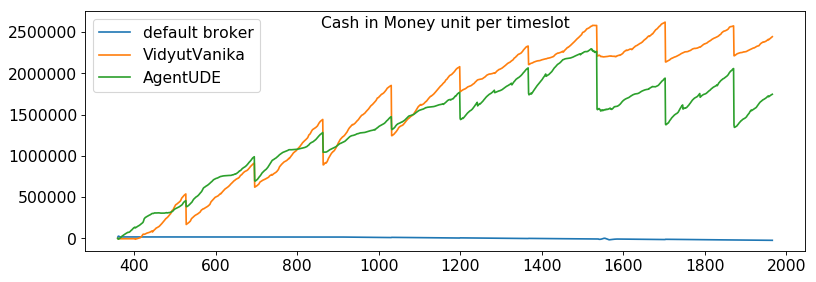

In [38]:
plotBrokers(game1)

Over the game period, VidyutVanika gains an advantage on AgentUDE in small steps. At first, the two brokers are equal in cash, but after about the 1000th timeslot, the VidyutVanika's income is much higher and it does not loose the money in the capacity transaction. Both brokers have to pay a part of the regular capacity transactions that apply a penalty to imbalance contribution. In contrast to AgentUDE, VidyutVanika seems to balance better, especially with the very large capacity transaction at timeslot 1550, where AgentUDE drops by more than 500000.

Overall, VidyutVanika attracts customers as well as AgentUDE and gains a siginificant profit. It deals better with the imbalances and thus has to pay less for the imbalance capacity transaction.

### Game 2: gameID 1441
#### Competing brokers: Bunnie, AgentUDE

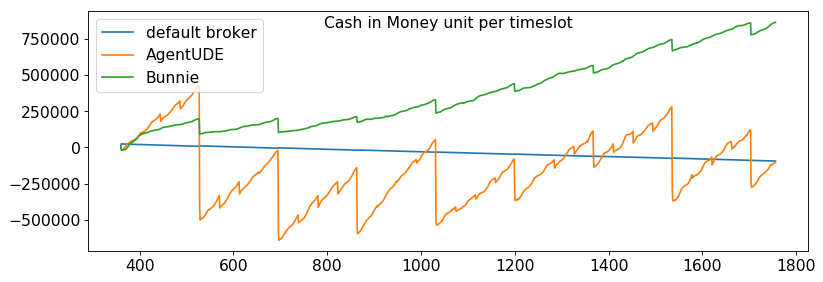

In [39]:
plotBrokers(game2)

The game is obviously very easily won by Bunnie broker. As the small slope of the income of Bunnie suggest, Bunnie has very few customers. With those few customers, Bunnie is able to predict their consumption very easily and is able to minimize the imbalance and thus the capacity transactions. The exact opposite is true for AgentUDE. It has a high slop wich suggests a large consumer base. But the broker struggles to keep the balance and has very large penalties, With almost 1 million price units in the first penalty. The broker does not recover from this bad start and is still having this problem in the later timeslots, only in a smaller scale of "only" 500000. 

The reason for this game loss is that AgentUDE does probably not predict the imbalance correctly and looses a lot of money after that.

### Game 3: gameID 1484
#### Competing brokers: COLDPower18, AgentUDE

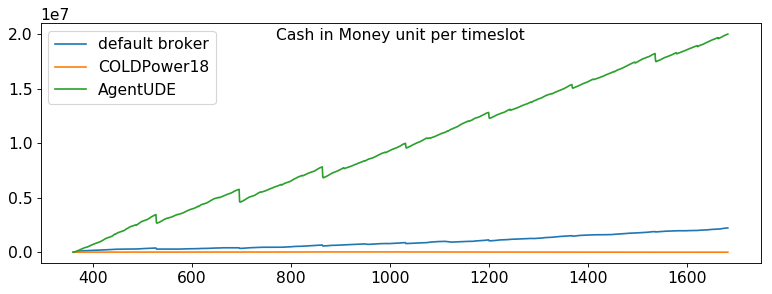

In [40]:
plotBrokers(game3)

Here, every element is working in the way of AgentUDE. A lot of customers select the tariffs offered by AgentUDE. Nevertheless, the prediction has to be good because the observed regular capacity payments are lower than above. This indicates that the prediction itself is capable of predicting the correct amount of energy to procure. Additionally, there seems to be almost no customer fluctuation.

In this game, AgentUDE builds a growing advantage on COLDPower18 without loosing a lot of money in the regular payments.

### Game 4: gameID 1382
#### Competing brokers: CrocodileAgent, COLDPower18, Bunnie, AgentUDE

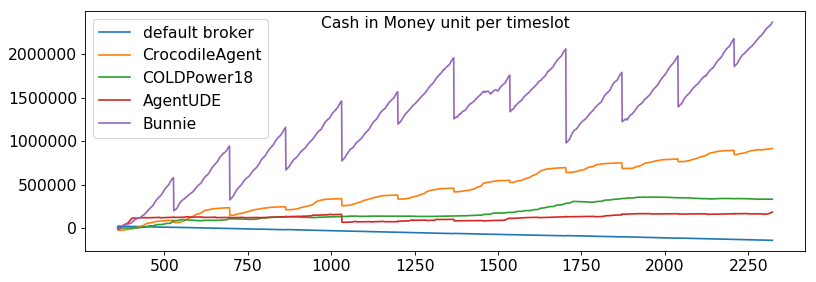

In [41]:
plotBrokers(game4)

In this game, AgentUDE is beaten by all three other brokers. As can be seen, the broker initially had some customers and a low income but lost this income and stayed on the same level until the something above 1000 timeslots. In the meantime, Bunnie had a high income and a profit, although loosing a lot of money on the regular penalties. Both CrocodileAgent and COLDPower18 have a higher income than AgentUDE, probably because they have more customers subscribed.

The main reason for the loss in this game should be the tarff design of AgentUDE.

### Game 5: gameID 1352
#### Competing brokers: EWIIS3, VidyutVanika, Bunnie, AgentUDE

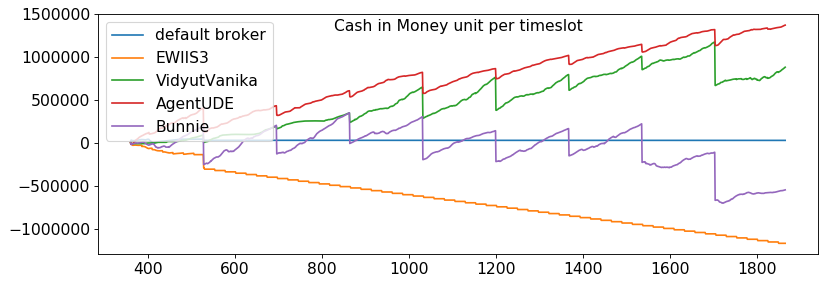

In [42]:
plotBrokers(game5)

In this game, AgentUDE develops an advantage on the other brokers over time. The relatively low slope suggests that AgentUDE does not attract many customers. On the other hand, it is able to keep the regular payments relatively low in comparison to the income which results in a small advantage on the other agents.

### Game 6: gameID 1398
#### Competing brokers: SPOT, COLDPower18, EWIIS3, AgentUDE

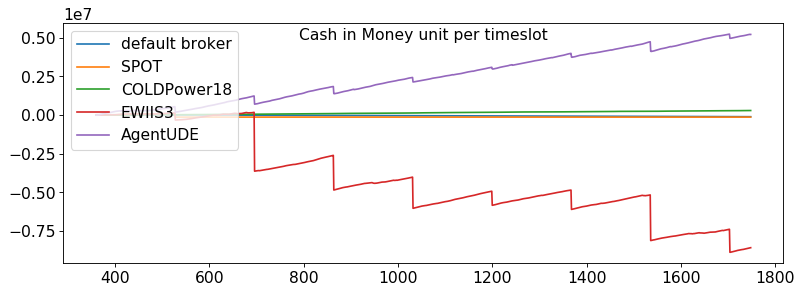

In [43]:
plotBrokers(game6)

In this game, AgentUDE takes the lead slowly. The fact that only EWIIS3 and AgentUDE have a noticeable income suggests that the agents have both a similar share of customers. Again, the imbalances seem to be low for AgentUDE. For this reason, most of the income from the customers translates into profit.

### Game 7: gameID 1355
#### Competing brokers: CrocodileAgent, EWIIS3, VidyutVanika, AgentUDE

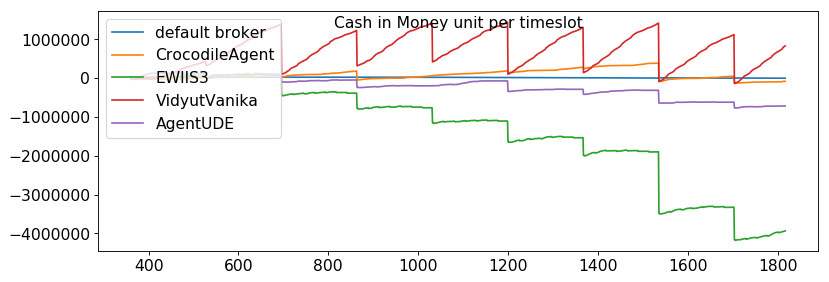

In [44]:
plotBrokers(game7)

In this game, some conditions of the market are set to very difficult terms. That can be said because none of the brokers is able to accumulate any amount of profit. AgentUDE does not get a high income and looses a small amount of money every time a capacity transaction arrives. This way, it is second to last agent, as both CrocodileAgent and VidyutVanika earn more money than AgentUDE.

### Game 8: gameID 1233
#### Competing brokers: Bunnie, COLDPower18, CrocodileAgent, EWIIS3, SPOT, VidyutVanika, AgentUDE

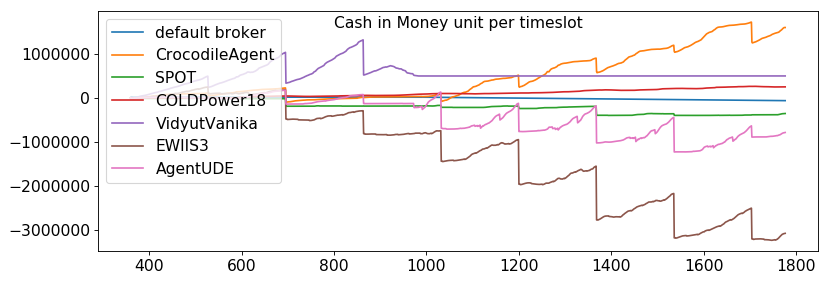

In [45]:
plotBrokers(game8)

In this game with all 7 brokers, AgentUDE is placed second to last. As can be seen, the competition on the customers is very high and no broker has a stable customer base. AgentUDE has again the problem that the imbalance capacity transactions are higher than the income generate by the subscribed customers and thus keeps losing money. On the other hand, AgentUDE is able to attract customers with its tariff model. It could be an explanation that the tariff conditions are to good for the customers and this results in losses for AgentUDE.

### Game 9: gameID 1238
#### Competing brokers: Bunnie, COLDPower18, CrocodileAgent, EWIIS3, SPOT, VidyutVanika, AgentUDE

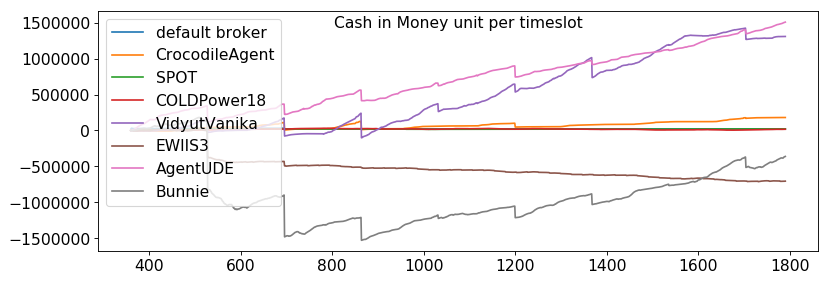

In [46]:
plotBrokers(game9)

In this game, AgentUDE is in close competition to VidyutVanika. Both brokers have an income that builds up a profit for the brokers. AgentUDE only wins by a very small margin, probably due to a better prediction in the last regular payment period.

### Game 10: gameID 1226
#### Competing brokers: Bunnie, COLDPower18, CrocodileAgent, EWIIS3, SPOT, VidyutVanika, AgentUDE

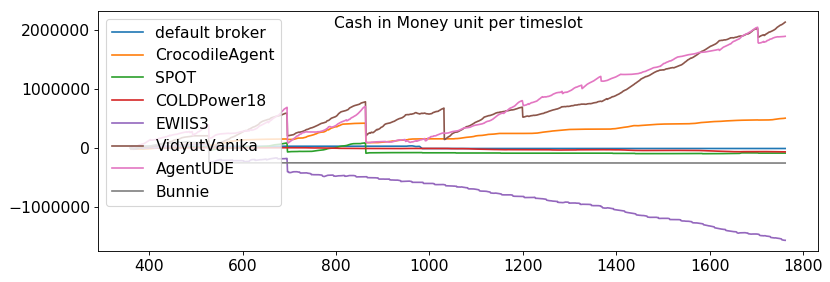

In [47]:
plotBrokers(game10)

This game resembles to the previous one where AgentUDE and VidyutVanika both have a very similar income. In this game, VidyutVanika is able to win. The missing regular payment in the mid to end of the simulation indicates that there was a period of good predictability, where VidyutVanika could earn more money than AgentUDE.

## Performance across markets
There exist three different markets: The balancing, wholesale and tariff market.

### Balancing market
##### Are there systematic imbalances?

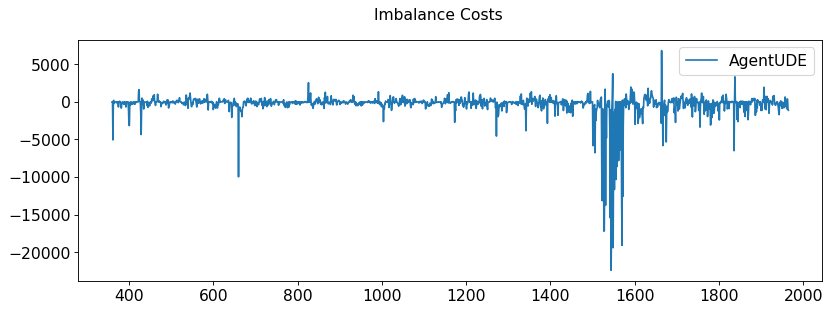

In [48]:
plotImbalanceCostsBroker(game1, "AgentUDE")

In the first selected game, there are no recognizable systematic imbalances. Most imbalances exist only for a very short time. Between the timeslots 1400 and 1600, there is a noticeable accumulation of imbalances. This indicates that either the wholesale market quantity was forecasted wrong or there was a big shift of customers that suddenly subscribed to the agents tariffs and the agent did not react fast enough.

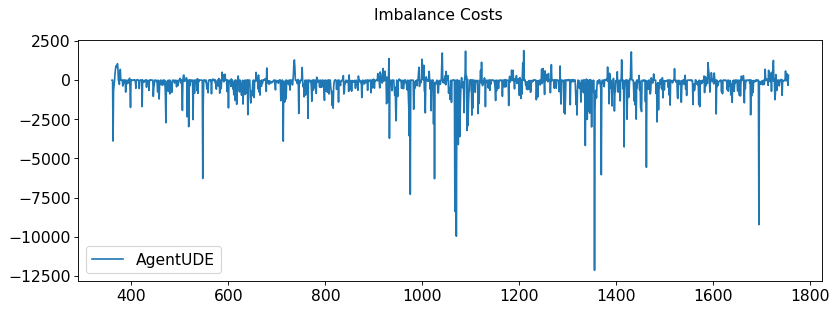

In [49]:
plotImbalanceCostsBroker(game2, "AgentUDE")

The second game shows more peaks where AgentUDE did not procure enough energy on the wholesale market. This is showing that there exist difficulties in the broker design to either predict the needed energy or to predict the probable wholesale market price. In both cases, the current broker design needs an enhancement.

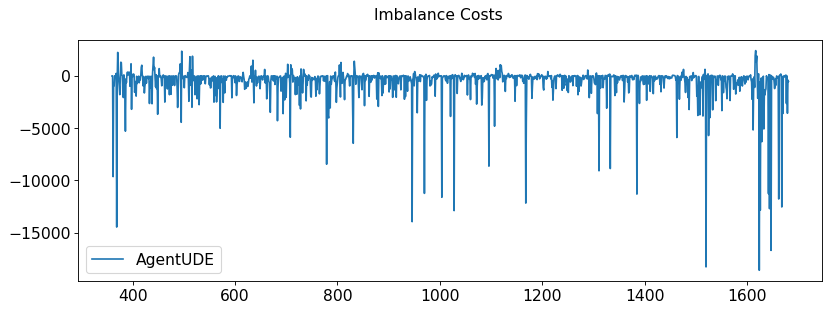

In [50]:
plotImbalanceCostsBroker(game3, "AgentUDE")

In the third game, there are again some major imbalances. They occur over the whole duration of the simulation. The major problem is that there exist periods where there are more imbalances in a short period of time together, which means the broker did not adapt to the change very fast. This indicates that there would be room for improvement.

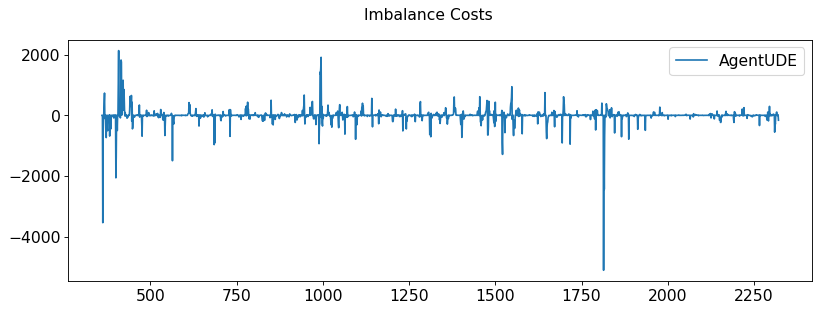

In [51]:
plotImbalanceCostsBroker(game4, "AgentUDE")

In this game, AgentUDE only had ver few imbalance issues. At the start of the game, there are some negative and positive imbalances which means there was some fluctuation in customers. Overall, the scale is much lower with just up to -4000 imbalance which means that the observed imbalance is not that bad.

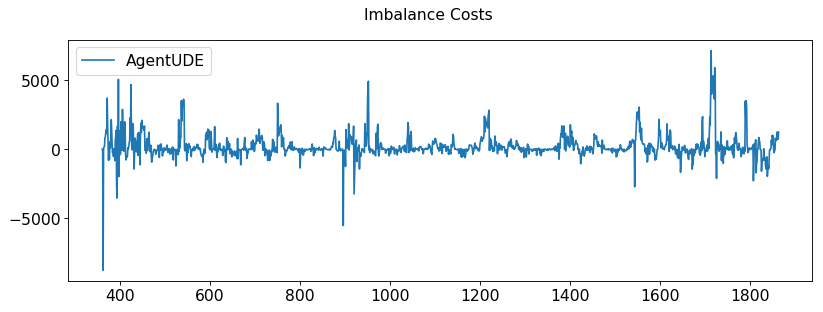

In [52]:
plotImbalanceCostsBroker(game5, "AgentUDE")

In the fifth game, the agent has a lot of imbalance in the positive direction which means that the broker bought too much energy on the wholesale market. Overall, the imbalances are rather small.

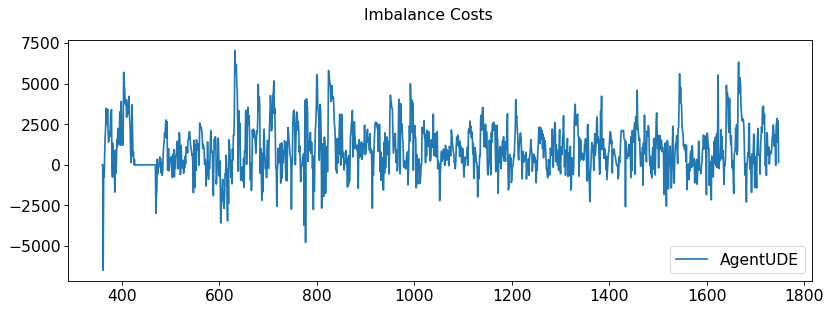

In [53]:
plotImbalanceCostsBroker(game6, "AgentUDE")

In the 6th game, AgentUDE is not able to forecast correctly at all. Both over and underprediction appear during the game. This game shows a weakness in the agents balancing strategy where there is no clear way to fix it. A deeper analysis of this game with more data might be useful to find the reason for this imbalance.

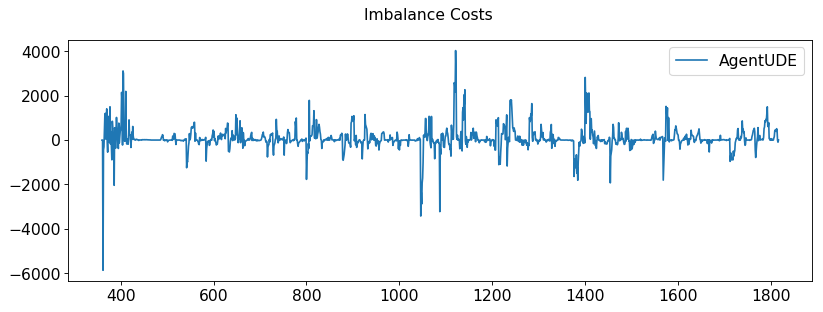

In [54]:
plotImbalanceCostsBroker(game7, "AgentUDE")

The seventh game again has a period at the beginning where the broker does not expect any customers at all. Later in the simulation, the broker mostly struggles not to buy too much energy. Overall, the plot shows that there was not a lot of action.

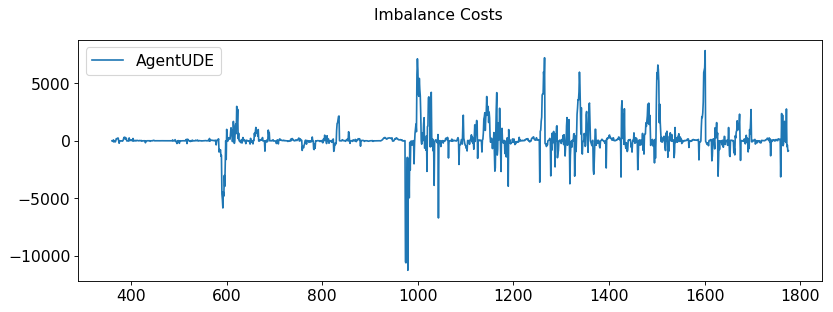

In [55]:
plotImbalanceCostsBroker(game8, "AgentUDE")

In this game, the broker has siginificant imbalances right before timeslot 1000. After this timeslot, the imbalances are mostly positive and are very volatile. This means that a lot of customer switching is going on and the broker does not predict those well. If the broker could foresee better when the customers decide to switch, it could reduce these imbalances by a lot.

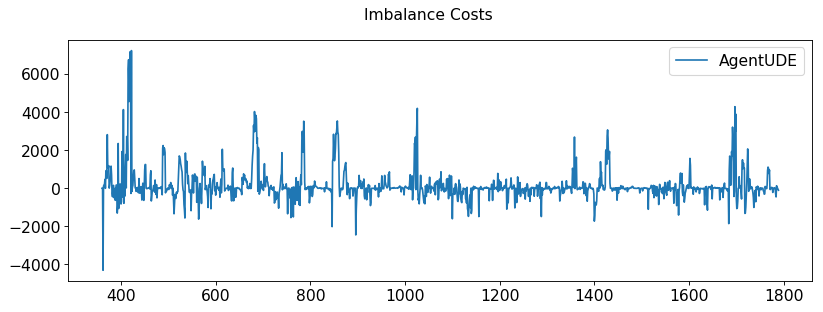

In [56]:
plotImbalanceCostsBroker(game9, "AgentUDE")

The 9th game stars off with a large overprediction. Overall, the agent buys too much energy on the wholesale market which means the broker looses his customers regularly. Although there is no systematic imbalance, the broker could act better.

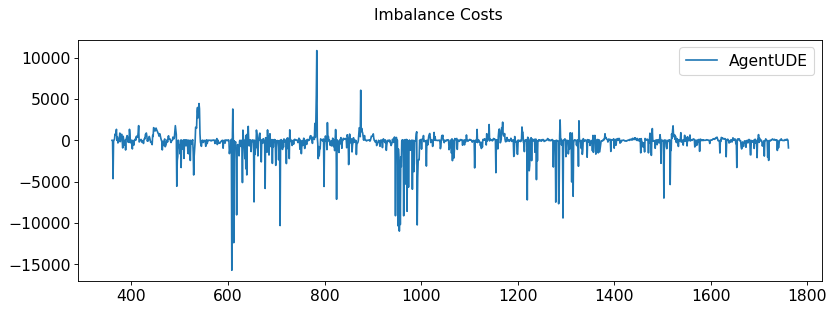

In [57]:
plotImbalanceCostsBroker(game10, "AgentUDE")

This game has very large imbalances in the negative and the positive. This means the broker wrongly evaluates the situation by a lot. The time intervals with misprediction where the broker buys less energy then needed occur three times, with a rather long period of wrongly predicting the demand. This could probably be fixed, because it could be accounted for faster.

##### How can you enhance next year’s balancing strategy?

From the imbalance performance seen in the visualization of the 10 games, the broker is overall already good at balancing the energy demand. It struggles whenever there are customers that switch tariffs often, which occured in a few games and resulted in significant losses for the broker. In the different environments, the broker had mostly problems with too many customers in less competitive environments like 2 broker games and more with overpredicting in games with all brokers.

Especially the procurement of too much energy is important to look at, because it may not be possible to forecast that customers choose the own tariff next, but the amount of customers that switch to a new tariff should be possible to forecast and adjust. Then, the agent could sell the energy on the wholesale market in the last timeslot before the switching happens and thus reduce the positive imbalance.

##### How do you perform compared to your competitors?

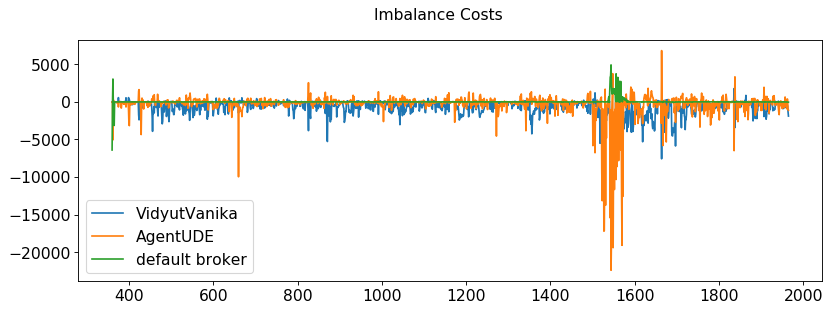

In [58]:
plotImbalanceCosts(game1)

In the first game, The broker is at first better at predicting and later in the game on a similar level. The spike in the later stage of the game only happens to AgentUDE which means that this problem should be fixable in a newer version of the broker.

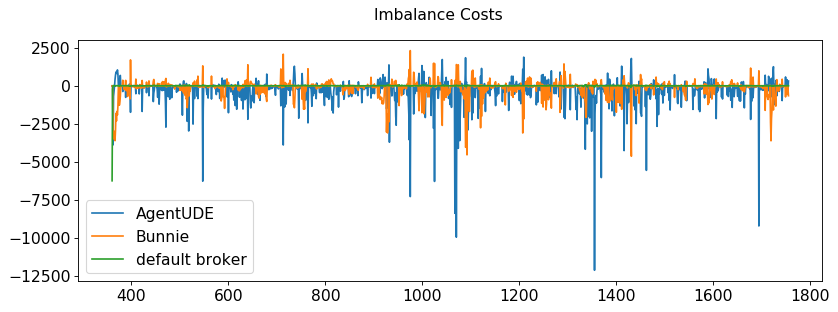

In [59]:
plotImbalanceCosts(game2)

In this game, the imbalance costs for AgentUDE are much higher compared to Bunnie. It is possible that this is the major issue and leads to the game loss, where AgentUDE even ends up with a negative balance.

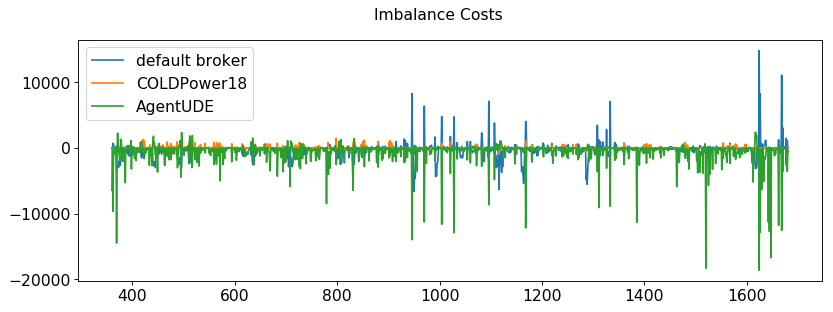

In [60]:
plotImbalanceCosts(game3)

In the third game, AgentUDE has more imbalance than COLDPower18, from which some could be reduced via better forecasting. The other broker is much better at balancing his demand and supply and maybe his strategy could be used to improve AgentUDE. On the other hand, the extremely low level of imbalance could also come from having no customers, which is not that good in terms of profit.

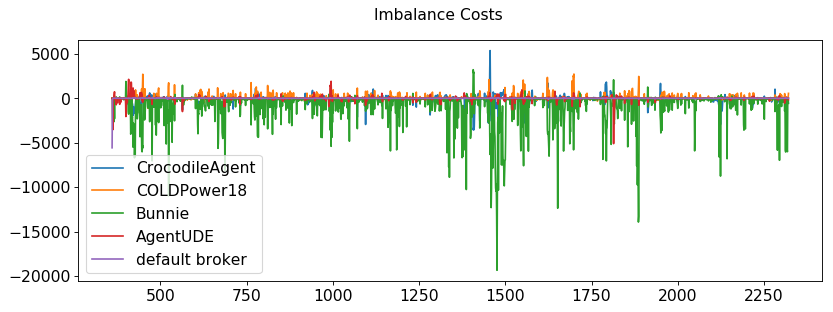

In [61]:
plotImbalanceCosts(game4)

In the fourth game, AgentUDEs imbalance is much lower than the one of Bunnier broker. COLDPower18 seems to be on a similar level and CrocodileAgent only is visible in very few timeslots, meaning his imbalance is lower than the one of the other brokers. In comparison to Bunnie, AgentUDE's imbalance seems good, but in comparison to COLDPower18 or CrocodileAgent there is still room to improve

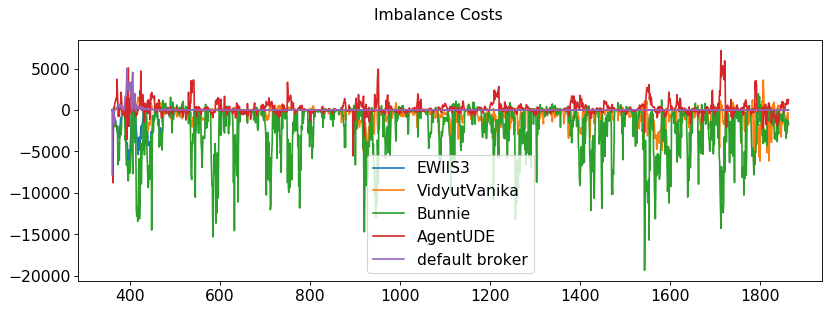

In [62]:
plotImbalanceCosts(game5)

The fifthe game invovles Bunnie again which has the highest imbalance. VidyutVanika and AgentUDE have a similar imbalance, with AgentUDE having more positive imbalances. The EWIIS3 broker is not visible. Compared to the better broker VidyutVanika, AgentUDE needs to lower the positive imbalances to be able to act competitively.

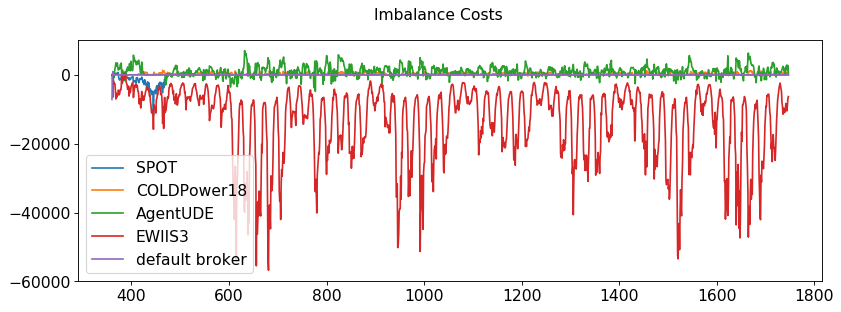

In [63]:
plotImbalanceCosts(game6)

The 6th game shows that EWIIS3 does not perform well in terms of balancing. AgentUDE has the highest imbalance among the competitors, with COLDPower18 having a small amount of imbalance and SPOT only having some imbalance at the start of the game.

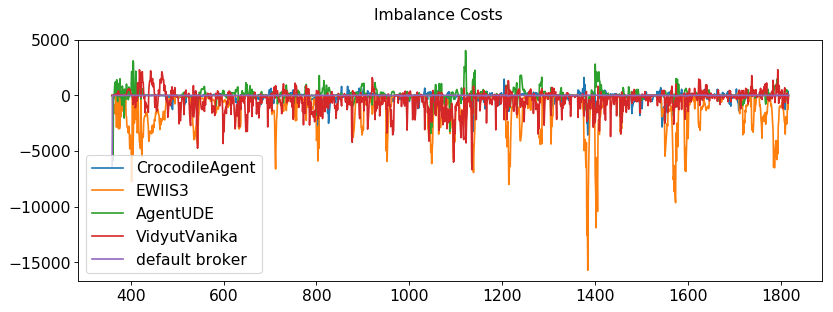

In [64]:
plotImbalanceCosts(game7)

The seventh game shows that there are cases where AgentUDe does not have a high imbalance. VidyutVanika has a larger imbalance, as well as EWIIS3. Only CrocodileAgent has lower imbalances. 

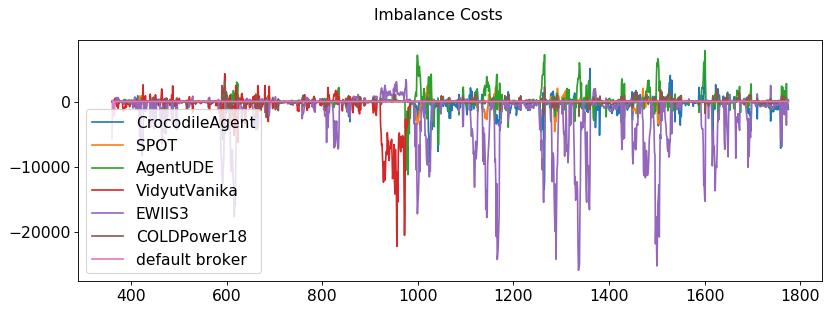

In [65]:
plotImbalanceCosts(game8)

The eighth game shows a change in imbalance between the first 1000 and the second 1000 timeslots. At the beginnning, AgentUDE has almost no imbalance and VidyutVanika as well as COLDPower18 have a higher imbalance. Later in the simulation, AgentUDE has significant imbalances as well as CrocodileAgent and EWIIS3 but VidyutVanika and COLDPower18 have almost none.

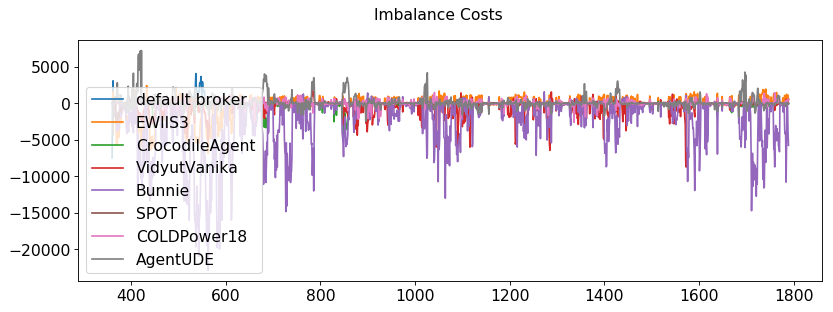

In [66]:
plotImbalanceCosts(game9)

In the nineth game, AgentUDE has larger positive imbalances than any other broker. On the other hand, the negative imbalances are not too high. This way, it has less negative imbalances than Bunnie and VidyutVanika, being on a similar level to COLDPower18.

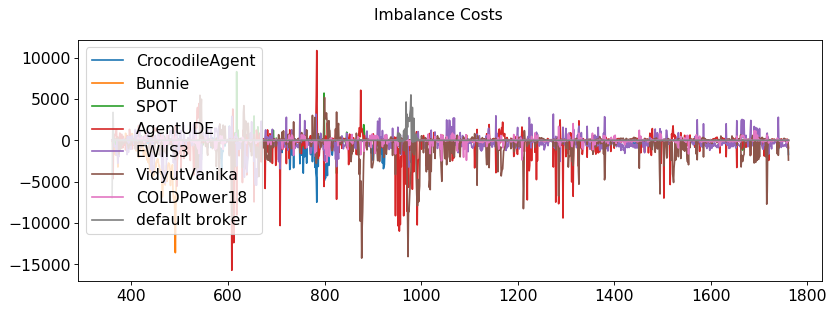

In [67]:
plotImbalanceCosts(game10)

The tenth game features high imbalances for all brokers, including VidyutVanika, AgentUDE and Bunnie. The range of the imbalances are smaller towards the end of the simulation. AgentUDE again is amongst the brokers with the highest positive imbalance. This indicates that to become better, the broker needs to improve it forecasting for customers switching tariff to another broker.

### Wholesale market
Please note that wholesale market prices may be provided as costs. 
Hence the actual price is (-1) times the value provided (see, e.g., BrokerMktPrices)

##### Do you use the cost-efficient trading periods (the time delay until delivery) when you trade your quantities?

In [68]:
gameName = str(game1["gameName"].values[0])
df = pd.read_csv("2018 Finals/"+gameName+"_BrokerMktPrices.csv", sep=";")
df.head()

ts   dow   hod default broker_mwh  default broker_price  VidyutVanika_mwh  \
0  361     3     1           [33.4692              -32.1976]          [0.1500   
1  362     3     2           [37.2918              -26.0949]          [0.3911   
2  363     3     3           [40.4835              -26.6669]          [0.4819   
3  364     3     4           [48.6635              -26.4602]          [0.7398   
4  365     3     5           [54.8831              -32.9547]          [0.9485   

   VidyutVanika_price  AgentUDE_mwh  AgentUDE_price   
0            -32.1976]      [0.0000          0.0000]  
1            -28.6420]      [0.0000          0.0000]  
2            -31.7392]     [39.6372        -32.0601]  
3            -25.7201]     [48.6556        -30.8163]  
4            -30.6249]     [53.0884        -37.4710]

From the table given, it is not possible to extract the information that is wanted. To discover the effect of using cost efficient trading periods, there would be needed more data. This data would have to contain information for each timeslot saying for which timeslot the energy was traded and at which price. If this data would be available, it would be possible to look at the price development for a timeslot and look when the agent decides to buy the power for that timeslot. If there is a timeslot where the price for the target timeslot is lower than the one where the agent decided to buy the energy, the agent is not using the best trading period.

##### How do you perform compared to your competitors?

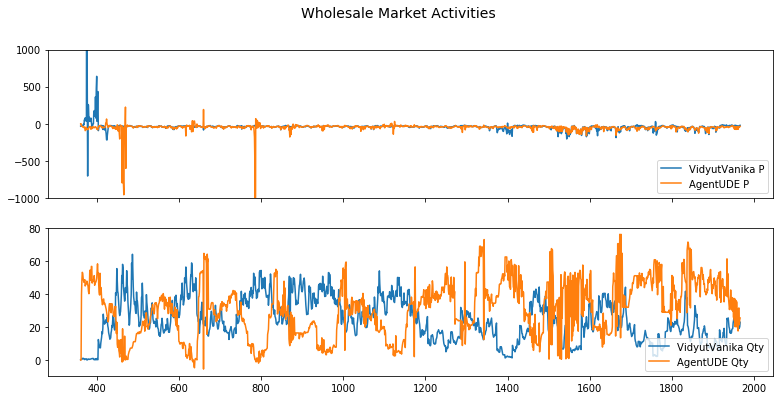

In [110]:
plotWholesaleMarket(game1, [-1000,1000])

In comparison to Vidyut Vanika, there is not a lot of difference. Both brokers trade similar quantities at the start of the simulation with VidyutVanika buying a little more at the end. The prices look very similar. At the start of the simulation, AgentUDE and VidyutVanika have very high and very low price offerings, but they do not appear later in the game. This indicates that the brokers try to guarantee their desired quantity.

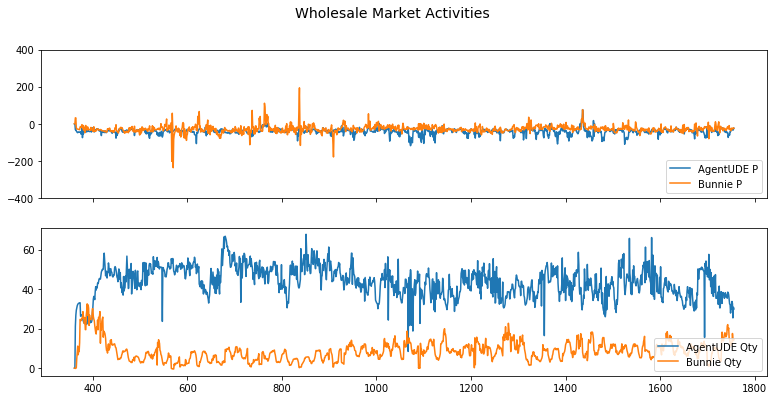

In [114]:
plotWholesaleMarket(game2, [-400,400])

In the second game, AgentUDE has a little higher prices than Bunnie. Additionally, Bunnie also sells energy on the wholsale market. The lower variance in price for Bunnie can be a factor that favors the broker in terms of profit. Additionally, Bunnie also realizes loewer prices.

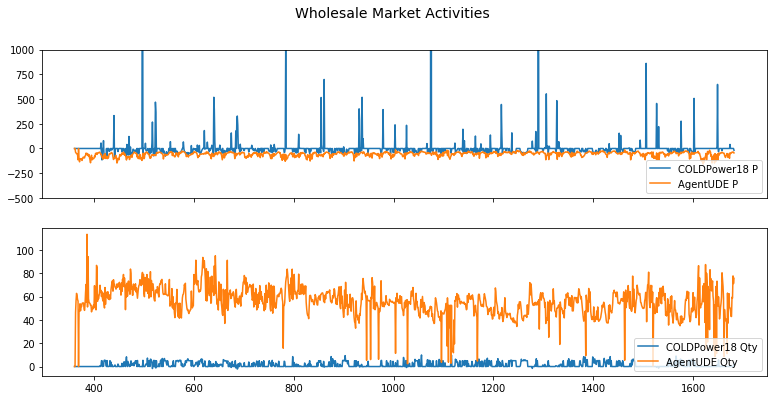

In [116]:
plotWholesaleMarket(game3, [-500,1000])

In this game, AgentUDE has very stable prices. COLDPower18 sells small amounts of energy even realizing very high prices. This game looks particularly good for AgentUDE, although COLDPower18 has lower prices for buying energy.

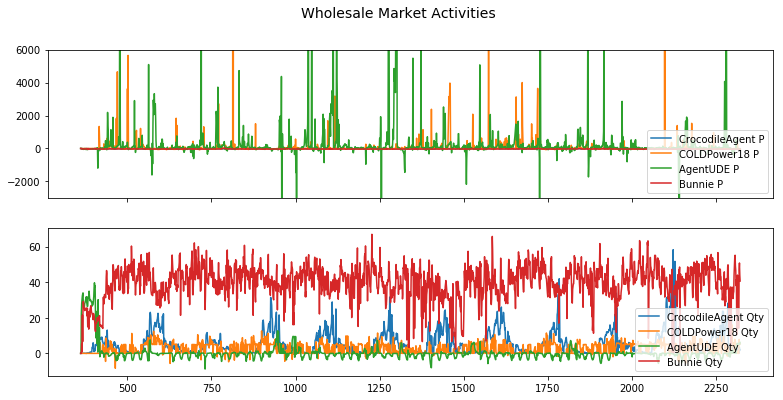

In [121]:
plotWholesaleMarket(game4, [-3000, 6000])

In this game, there can be seen that AgentUDE really struggles to find an acceptable market price. The selling energy requests are higher than those of COLDPower18 and in some time intervals AgentUDE even buys energy for very high prices. The quantity for AgentUDE is negative a lot of the time which means that the agent is selling energy. In this game, the trading on the wholesale market is worse compared to CrocodileAgent and Bunnie.

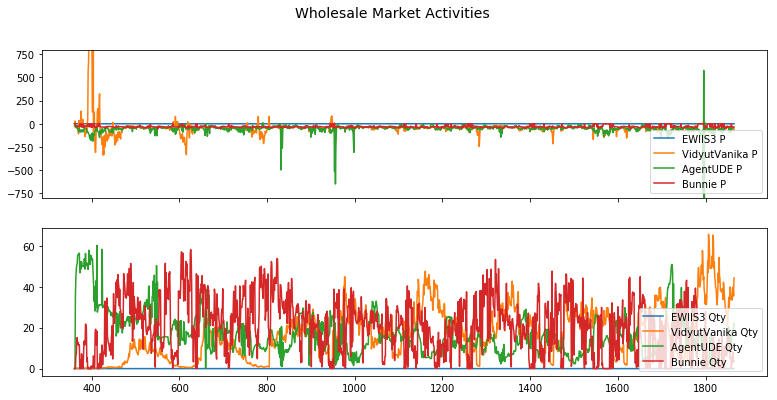

In [125]:
plotWholesaleMarket(game5, [-800, 800])

In the fifth game, AgentUDE has again problems to get his desired energy amount and thus uses very high buying prices. Both Bunnie and VidyutVanika realize lower prices.

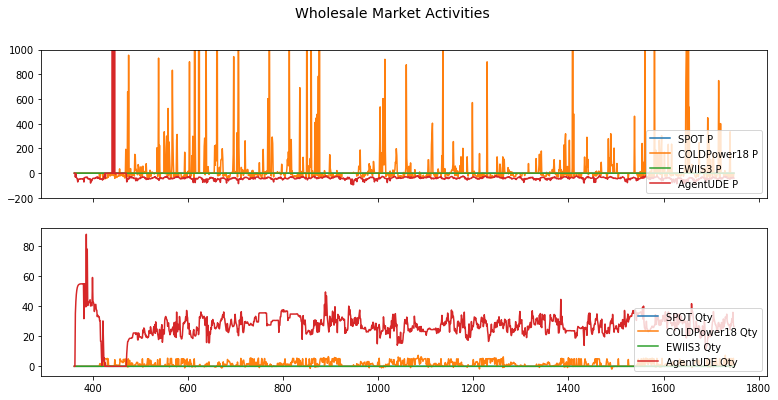

In [127]:
plotWholesaleMarket(game6, [-200, 1000])

In this game, AgentUDE realizes again prices that are worse compared to COLDPower18. On the other hand, the broker trades a decent quantity of energy.

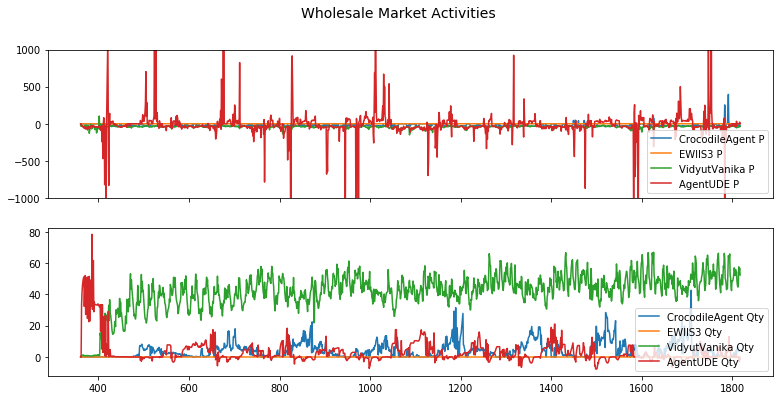

In [130]:
plotWholesaleMarket(game7, [-1000, 1000])

In the seventh game, AgentUDE has some issues trading in comparison to the other brokers. The energy is either bought for very high prices or sold for very high prices, which means that the broker is not acting good in this simulation. The other brokers do not have a similar problem.

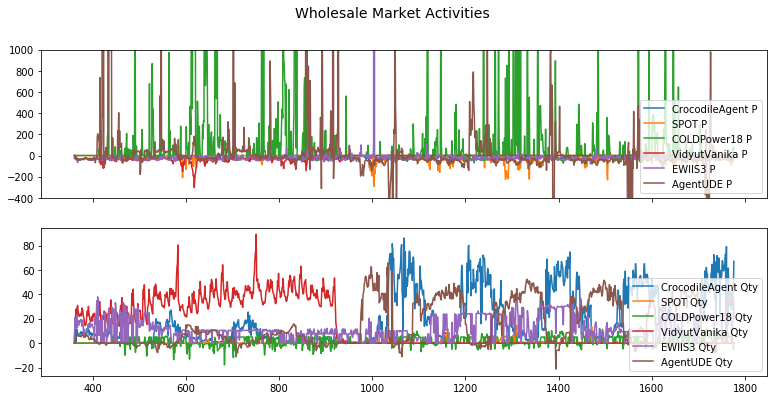

In [139]:
plotWholesaleMarket(game8, [-400, 1000])

In game number 8, there are very variant prices. Brokers buy and sell energy, which means they bought too much energy and try to resell it later. AgentUDE suffers from this problem regularly, every time the quenatity is very low there are these spikes.

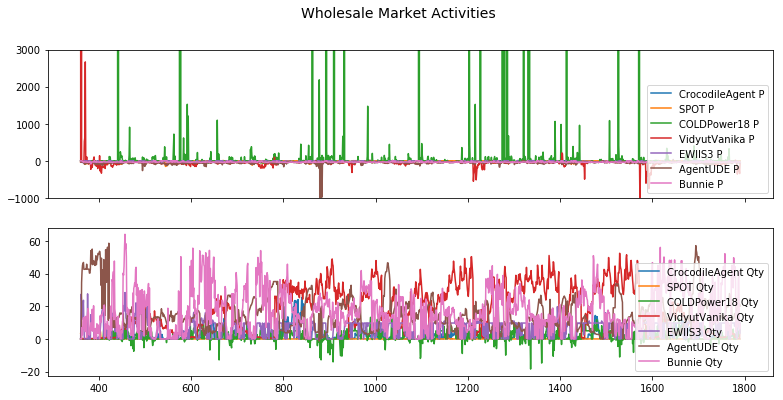

In [138]:
plotWholesaleMarket(game9, [-1000, 3000])

In the nineth game, AgnetUDE buys for a higher price than VidyutVanika and Bunnie. This means that it would have been possible to trade the energy for less money and indicates potential to improve the broker.

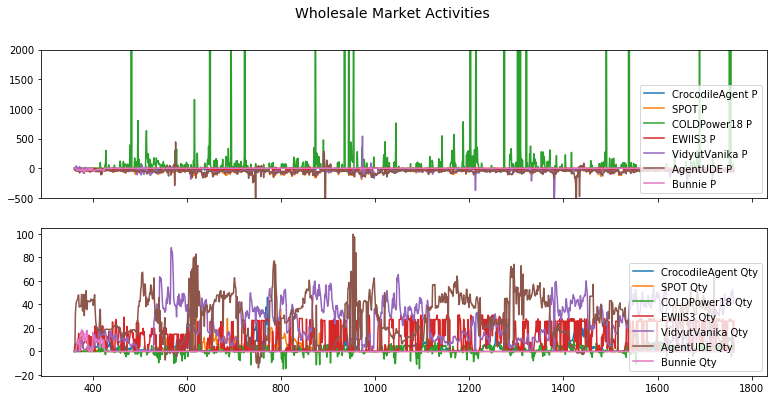

In [136]:
plotWholesaleMarket(game10, [-500, 2000])

The last game shows the same difficulties as the other games before, that AgentUDE pays more than other brokers for the energy bought on the wholesale market.

### Tariff market
##### How attractive is your tariff design?

This question can only be answered using the next question. The attractivity of the tariff design can only be measured in means of subscribed customers. If there are more customers using the broker's tariff, then the design is more attractive than the tariff design of competitors.

##### How does the share of customer subscribed to your tariffs develop over time? Visualize your results.

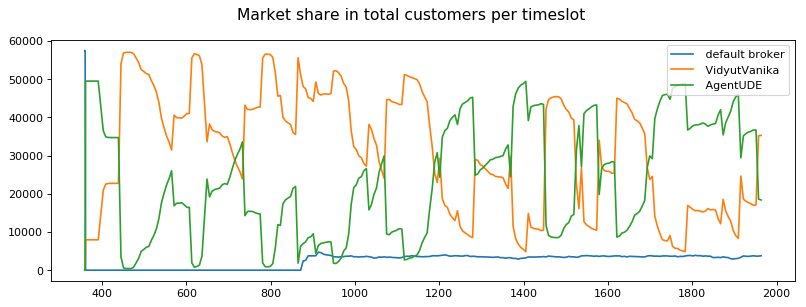

In [70]:
plotMarketShare(game1)

In the first game, the broker's market share is only high for the first few timeslots. Then, the broker looses all of its market share. Over the course of the simulation, the tariffs seem to be adapted and attract customers which is then answered by the other broker which leads to a loss of market share. After the 1200 timeslot, the brokers market share increases, which means that the tariff design has to be more attractive than before.

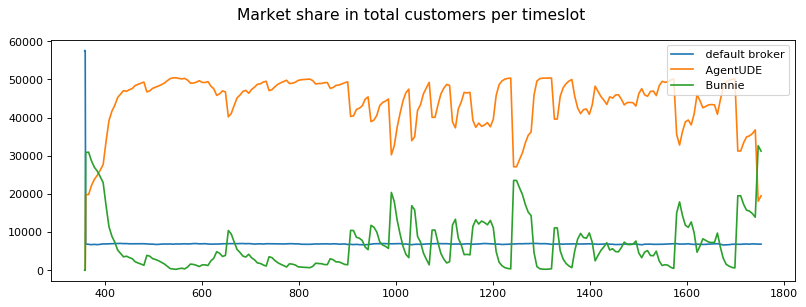

In [71]:
plotMarketShare(game2)

The second game shows that the tariff design used by AgentUDE is very competitive in regard to the Bunnie broker. Across the whole simluation, the broker has the majority of customers subscribed with increasing fluctuation at the end of the simulation. In comparison to Bunnie, the tariff design seems to be attractive.

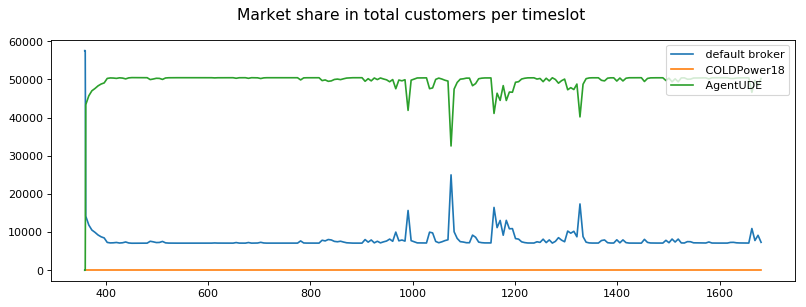

In [72]:
plotMarketShare(game3)

In this game, AgentUDE dominates the market with very high market shares for its tariffs. The competing broker does not develop tariffs that are competitive to the tariffs of AgentUDE. This shows that the tariff design can be extremely successful under specific conditions.

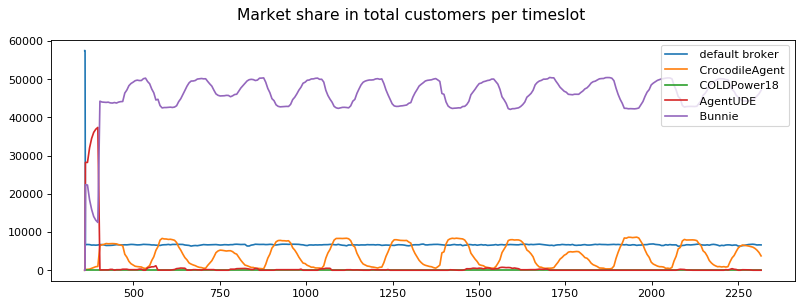

In [73]:
plotMarketShare(game4)

The fourth game is the first game with higher competition due to more brokers that is analyzed here. In this specific game, AgentUDE struggles to gain a significant amount of customers. This means that the tariffs are not fitting the needs of the customers. It is very likely that it is also the reason for the game loss.

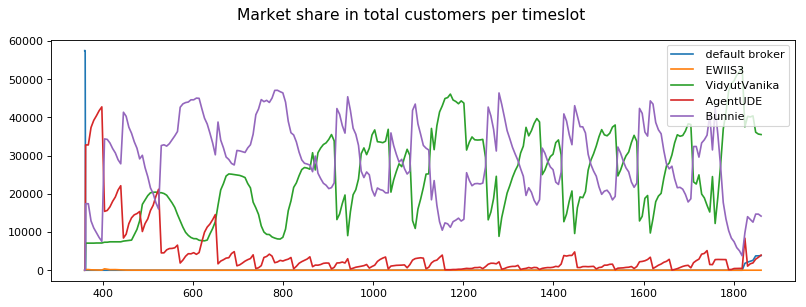

In [74]:
plotMarketShare(game5)

In the fifth game, the tariffs start off good, but then the customers choose different tariffs. The tariffs offered by AgentUDE are still used by a very small amount of customers, with a little variation. This means that the tariffs are attractive for some customers but most do not choose to subscribe to AgentUDEs tariffs.

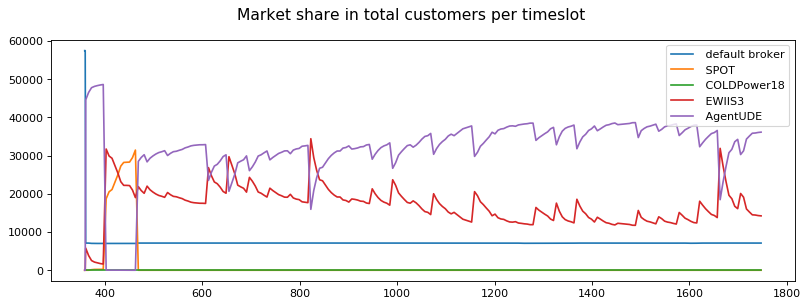

In [75]:
plotMarketShare(game6)

The sixth game shows a case where AgentUDE has the highest market share, being above all competitors. The pattern of repeated drops in customer share indicate that for some customers other tariffs are more attractive. Overall, AgentUDE is able to have a higher tariff market share than all other brokers. 

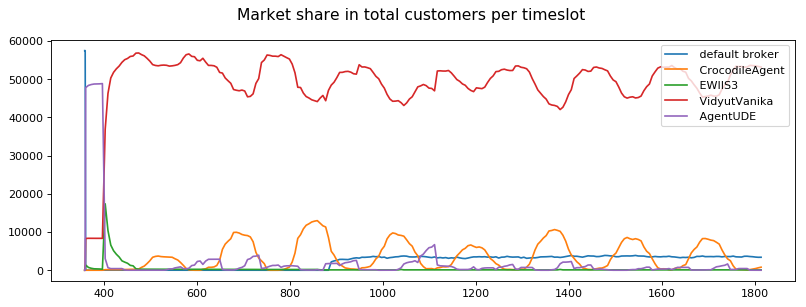

In [76]:
plotMarketShare(game7)

In this game, AgentUDE does not have a high market share. Although it initially attracts a large portion of customers, the tariff strategy is not able to regain a large market share. The small peaks indicate that repeated adaptions of the tariff model attract some customers that later choose to switch back to another tariff.

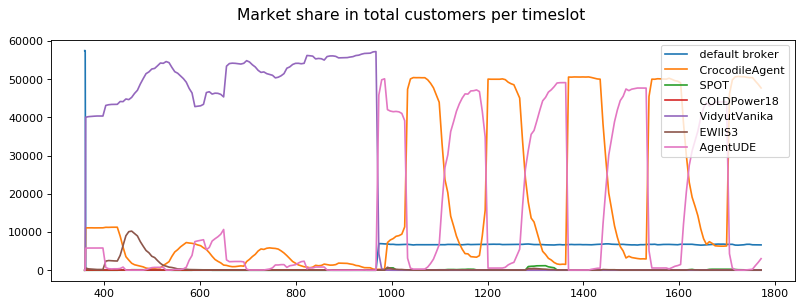

In [77]:
plotMarketShare(game8)

In this first 7 player game, AgentUDE starts off with a very low market share. Later in the game, after a bit below 1000 timeslots, the broker starts to design tariffs that attract a large portion of customers. As the number fluctuate in regular intervals between CrocodileAgent and AgentUDE, it is likely that the tariffs are similar and the customers switch between these two brokers in regular intervals. Overall, the tariff design is likely competitive with the other tariff models.

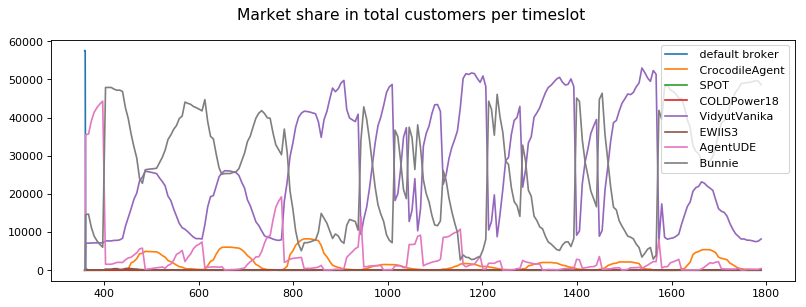

In [78]:
plotMarketShare(game9)

In the 9th game, AgentUDE is not able to gain a significant market share. It only attracts few customers for short periods but looses them regularly too. Across the simulation, AgentUDE does not offer a tariff that attracts many customers.

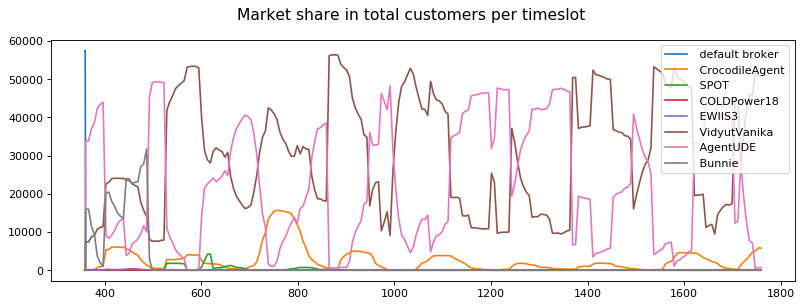

In [79]:
plotMarketShare(game10)

In the last selected game, AgentUDE is able to attract large portions of customers. During the simulation, the customers switch between the offered tariff and other brokers tariffs which results in a high fluctuation in the simulation. The tariff design has to be adapted well as the customers select it consistently over the simulated period, but also has some caveats as they choose to switch to another tariff after a short period.

##### From a monetary perspective, is your tariff design sustainable?

This question can be answered by comparing the income of the broker related to tariffs to the expenses on the wholesale market and the imbalance payments. If the difference between income and wholesale market price and imbalance payment is above zero on average, the tariff design is sustainable. If not, the broker tends to offer tariffs that generate less income than the broker spends on buying the required energy, which means this has to be adjusted.

In [80]:
def tariffSustainable(game, broker):
    gameName = getGameName(game)
    df = pd.read_csv("2018 Finals/"+gameName + "_BrokerAccounting.csv", sep=";")
    df['ttx-uc'] = df['ttx-uc'].replace({',':'.'},regex=True).astype(float)
    df['mtx-d'] = df['mtx-d'].replace({',':'.'},regex=True).astype(float)
    df['dtx-d'] = df['dtx-d'].replace({',':'.'},regex=True).astype(float)
    df['btx-d'] = df['btx-d'].replace({',':'.'},regex=True).astype(float)
    extracted_df = extractBrokers(df, [broker])
    result = extracted_df[broker]['ttx-uc'].astype(float) + extracted_df[broker]['mtx-d'].astype(float) + extracted_df[broker]['dtx-d'].astype(float) + extracted_df[broker]['btx-d'].astype(float)
    plt.plot(result.values)
    return np.mean(result.values)

3182.168059303049

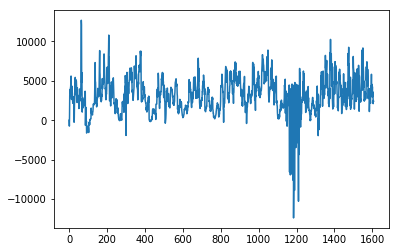

In [81]:
tariffSustainable(game1, "AgentUDE")

On average, the broker tariff design is sustainable. The plot shows that there are periods in which the broker does not have a higher income than payments, but the concept of gaining more money than paying for the energy is fulfilled. The only unsustainable period is the one where the broker does not buy the energy on the wholesale market but has to buy the energy on the balancing market which is more costly than buying it on the wholesale market.

3200.3914395848246

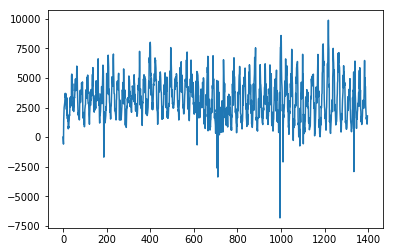

In [82]:
tariffSustainable(game2, "AgentUDE")

In this game, the tariffs are sustainable not only on average but also the majority of the time. In some specific slots, there are more tariff associated costs than payments, but these match the imbalances where the broker buys energy on the balancing market. 

20359.334254119425

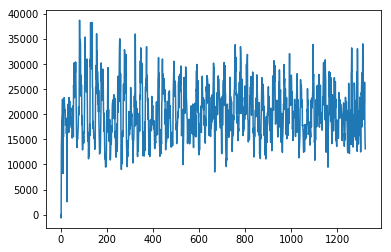

In [83]:
tariffSustainable(game3, "AgentUDE")

In this game, the tariffs are sustainable across the whole simulation. There is no point in time where the income is below 0, which means that the broker strategy is working very well.

77.9594534895568

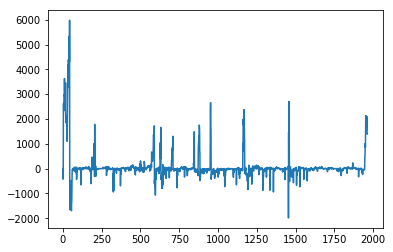

In [84]:
tariffSustainable(game4, "AgentUDE")

In this game, the tariff design is not that good. It is mostly zero, which means that the broker has almost no income. In this case, only a few higher losses are enough to make the broker loose a lot of money.

1438.3967049136786

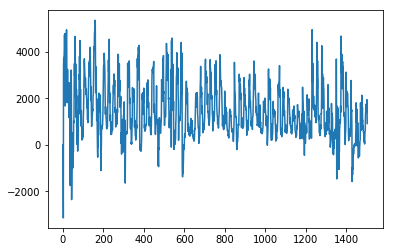

In [85]:
tariffSustainable(game5, "AgentUDE")

In this game, the tariff design is again mostly sustainable, with the broker earning a lot of money. There are timeslots with negative income, but they are outweighed by the timeslots that have a very high income.

4552.523857307416

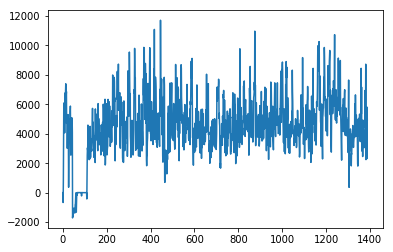

In [86]:
tariffSustainable(game6, "AgentUDE")

The 6th game again has a good tariff design that is calculated to be above the costs associated with the tariffs. From the tariff design perspective, there is not a lot to improve.

366.3271268175583

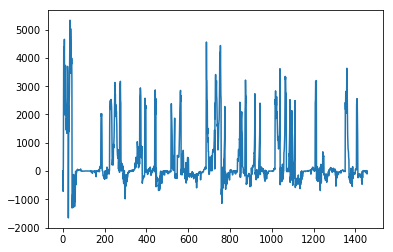

In [87]:
tariffSustainable(game7, "AgentUDE")

The seventh game is more volatile than the previous ones, with periods with high profit and periods with losses. Even though the average is above zero, it is possible that the majority of time the tariff is unsustainable.

2358.692427875794

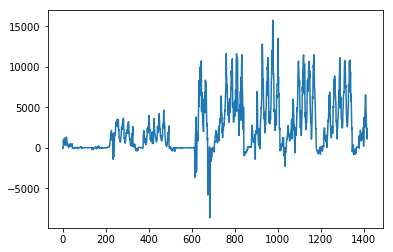

In [140]:
tariffSustainable(game8, "AgentUDE")

This game is very clearly a sustainable game, with a good tariff design strategy at the end of the simulation.

1303.3489786163523

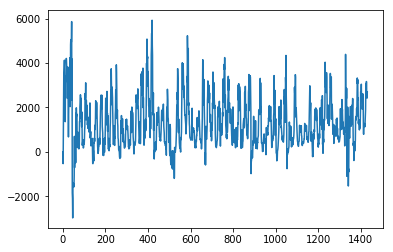

In [142]:
tariffSustainable(game9, "AgentUDE")

The nineth game again has a good tariff design with the average and the observable tariff money being positive.

2390.667792516037

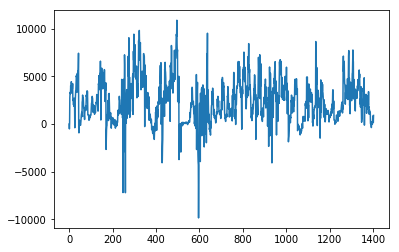

In [143]:
tariffSustainable(game10, "AgentUDE")

The last game has some time intervals with an unsustainable tariff design, but the majority of the time the tariff works in favor of AgentUDE.

## Conclusion 
### Specific competitors
What is the impact of specific competitors on your overall performance?

The brokers that show the strongest competition with AgentUDE are VidyutVanika, Bunnie and CrocodileAgent. Mostly in the larger games, the brokers gain market share and are able to realize a higher profit than AgentUDE.

COLDPower18 is a broker that leads to improved performance in most games, because the broker does not reduce the tariff prices aggressively to gain market share.

### Specific market segments
In which market segments do you show competitive advantages and strengths?

The balancing market is the main area of concern. There, the broker has some weaknesses that lead to large losses and explain some of the game losses. On the wholesale market, the broker acts good, but compared to some other brokers the performance could be improved. The main competitive advantage can be found in the tariff market, where the broker has large market share in most games whilst designing sustainable tariff models. Overall, the tariff design is probably the main strength of AgentUDEs broker design